'YEAR',

'QUARTER',

'MONTH',

'DAY_OF_MONTH',

'DAY_OF_WEEK',

'FL_DATE',

'UNIQUE_CARRIER',

'AIRLINE_ID',

'CARRIER',

'TAIL_NUM',

'FL_NUM',

'ORIGIN_AIRPORT_ID',

'ORIGIN_AIRPORT_SEQ_ID',

'ORIGIN_CITY_MARKET_ID',

'ORIGIN',

'ORIGIN_CITY_NAME',

'ORIGIN_STATE_ABR',

'ORIGIN_STATE_FIPS',

'ORIGIN_STATE_NM',

'ORIGIN_WAC',

'DEST_AIRPORT_ID',

'DEST_AIRPORT_SEQ_ID',

'DEST_CITY_MARKET_ID',

'DEST',

'DEST_CITY_NAME',

'DEST_STATE_ABR',

'DEST_STATE_FIPS',

'DEST_STATE_NM',

'DEST_WAC',

'CRS_DEP_TIME',

'DEP_TIME',

'DEP_DELAY',

'DEP_DELAY_NEW',

'DEP_DEL15',

'DEP_DELAY_GROUP',

'DEP_TIME_BLK',

'TAXI_OUT',

'WHEELS_OFF',

'WHEELS_ON',

'TAXI_IN',

'CRS_ARR_TIME',

'ARR_TIME',

'ARR_DELAY',

'ARR_DELAY_NEW',

'ARR_DEL15',

'ARR_DELAY_GROUP',

'ARR_TIME_BLK',

'CANCELLED',

'CANCELLATION_CODE',

'DIVERTED',

'CRS_ELAPSED_TIME',

'ACTUAL_ELAPSED_TIME',

'AIR_TIME',

'FLIGHTS',

'DISTANCE',

'DISTANCE_GROUP',

'CARRIER_DELAY',

'WEATHER_DELAY',

'NAS_DELAY',

'SECURITY_DELAY',

'LATE_AIRCRAFT_DELAY',

'FIRST_DEP_TIME',

'TOTAL_ADD_GTIME',

'LONGEST_ADD_GTIME',

'Unnamed: 64'


# Import

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
import missingno as msno

In [4]:
data_path = '../data'
file_names = [f'2016_{str(n+1).zfill(2)}.csv' for n in range(12)]
file_names

['2016_01.csv',
 '2016_02.csv',
 '2016_03.csv',
 '2016_04.csv',
 '2016_05.csv',
 '2016_06.csv',
 '2016_07.csv',
 '2016_08.csv',
 '2016_09.csv',
 '2016_10.csv',
 '2016_11.csv',
 '2016_12.csv']

In [70]:
dfs = []

for i in range(12):
    dtype_spec = None
    if i in [2, 4, 5, 8, 9, 10, 11]:
        dtype_spec = {48: 'str'}
    elif i == 3:
        dtype_spec = {
            0: 'str', 1: 'str', 3: 'str', 4: 'str', 10: 'str', 11: 'str', 13: 'str',
            19: 'str', 20: 'str', 21: 'str', 22: 'str', 30: 'str', 36: 'str', 41: 'str', 48: 'str'
        }
    df_part = pd.read_csv(f'{data_path}/{file_names[i]}', on_bad_lines='skip', dtype=dtype_spec)
    print(f'File {i + 1}: {df_part.shape}')
    dfs.append(df_part)

df = pd.concat(dfs, ignore_index=True)

File 1: (445827, 65)
File 2: (423889, 65)
File 3: (479122, 65)


File 4: (479950, 65)
File 5: (479358, 65)
File 6: (487637, 65)
File 7: (502457, 65)
File 8: (498347, 65)
File 9: (454878, 65)
File 10: (472626, 65)
File 11: (450938, 65)
File 12: (460949, 65)


In [71]:
df_init = df.copy()


# EDA

In [72]:
df.shape

(5635978, 65)

In [73]:
df.columns.tolist()

['YEAR',
 'QUARTER',
 'MONTH',
 'DAY_OF_MONTH',
 'DAY_OF_WEEK',
 'FL_DATE',
 'UNIQUE_CARRIER',
 'AIRLINE_ID',
 'CARRIER',
 'TAIL_NUM',
 'FL_NUM',
 'ORIGIN_AIRPORT_ID',
 'ORIGIN_AIRPORT_SEQ_ID',
 'ORIGIN_CITY_MARKET_ID',
 'ORIGIN',
 'ORIGIN_CITY_NAME',
 'ORIGIN_STATE_ABR',
 'ORIGIN_STATE_FIPS',
 'ORIGIN_STATE_NM',
 'ORIGIN_WAC',
 'DEST_AIRPORT_ID',
 'DEST_AIRPORT_SEQ_ID',
 'DEST_CITY_MARKET_ID',
 'DEST',
 'DEST_CITY_NAME',
 'DEST_STATE_ABR',
 'DEST_STATE_FIPS',
 'DEST_STATE_NM',
 'DEST_WAC',
 'CRS_DEP_TIME',
 'DEP_TIME',
 'DEP_DELAY',
 'DEP_DELAY_NEW',
 'DEP_DEL15',
 'DEP_DELAY_GROUP',
 'DEP_TIME_BLK',
 'TAXI_OUT',
 'WHEELS_OFF',
 'WHEELS_ON',
 'TAXI_IN',
 'CRS_ARR_TIME',
 'ARR_TIME',
 'ARR_DELAY',
 'ARR_DELAY_NEW',
 'ARR_DEL15',
 'ARR_DELAY_GROUP',
 'ARR_TIME_BLK',
 'CANCELLED',
 'CANCELLATION_CODE',
 'DIVERTED',
 'CRS_ELAPSED_TIME',
 'ACTUAL_ELAPSED_TIME',
 'AIR_TIME',
 'FLIGHTS',
 'DISTANCE',
 'DISTANCE_GROUP',
 'CARRIER_DELAY',
 'WEATHER_DELAY',
 'NAS_DELAY',
 'SECURITY_DELAY',
 'LA

In [74]:
df.describe()

,MONTH,AIRLINE_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_STATE_FIPS,DEST_STATE_FIPS,DEST_WAC,CRS_DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,...,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,Unnamed: 64
count,5.635978e+06,5.635978e+06,5.635978e+06,5.635978e+06,5.635978e+06,5.635978e+06,5.635978e+06,5.572439e+06,5.572439e+06,5.572438e+06,...,5.635973e+06,968440.000000,968440.000000,968440.000000,968440.000000,968440.000000,34533.000000,34533.000000,34533.000000,0.0
mean,6.510400e+00,1.990272e+04,1.267619e+06,2.570476e+01,2.570177e+01,5.573331e+01,1.331097e+03,8.981658e+00,1.190612e+01,1.723490e-01,...,3.864900e+00,20.301263,2.709674,14.697945,0.085111,24.339327,1328.282252,35.485072,34.968407,NaN
std,9.231540e+00,5.736427e+02,1.535734e+05,2.139670e+01,1.664150e+01,2.697536e+01,4.894508e+02,3.981842e+01,3.878355e+01,7.129725e-01,...,2.431485e+00,57.451040,21.434164,30.567764,2.426291,45.941604,503.640838,31.122975,30.092505,NaN
min,1.000000e+00,1.939300e+04,1.300000e+01,-9.000000e+00,-3.000000e+00,0.000000e+00,-1.000000e+00,-2.040000e+02,0.000000e+00,0.000000e+00,...,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,NaN
25%,3.000000e+00,1.979000e+04,1.129202e+06,1.200000e+01,1.200000e+01,3.400000e+01,9.150000e+02,-5.000000e+00,0.000000e+00,0.000000e+00,...,2.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,858.000000,16.000000,16.000000,NaN
50%,7.000000e+00,1.980500e+04,1.288903e+06,2.400000e+01,2.400000e+01,5.200000e+01,1.325000e+03,-2.000000e+00,0.000000e+00,0.000000e+00,...,3.000000e+00,2.000000,0.000000,2.000000,0.000000,2.000000,1348.000000,26.000000,26.000000,NaN
75%,9.000000e+00,2.030400e+04,1.402702e+06,4.000000e+01,4.000000e+01,8.200000e+01,1.735000e+03,6.000000e+00,6.000000e+00,0.000000e+00,...,5.000000e+00,18.000000,0.000000,19.000000,0.000000,30.000000,1734.000000,43.000000,42.000000,NaN
max,2.036600e+04,1.039705e+06,1.621801e+06,3.195300e+04,7.800000e+01,2.410000e+02,2.359000e+03,2.149000e+03,2.149000e+03,1.428000e+03,...,1.100000e+01,2142.000000,1157.000000,1446.000000,474.000000,1484.000000,2400.000000,335.000000,265.000000,NaN


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5635978 entries, 0 to 5635977
Data columns (total 65 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   YEAR                   object 
 1   QUARTER                object 
 2   MONTH                  int64  
 3   DAY_OF_MONTH           object 
 4   DAY_OF_WEEK            object 
 5   FL_DATE                object 
 6   UNIQUE_CARRIER         object 
 7   AIRLINE_ID             int64  
 8   CARRIER                object 
 9   TAIL_NUM               object 
 10  FL_NUM                 object 
 11  ORIGIN_AIRPORT_ID      object 
 12  ORIGIN_AIRPORT_SEQ_ID  int64  
 13  ORIGIN_CITY_MARKET_ID  object 
 14  ORIGIN                 object 
 15  ORIGIN_CITY_NAME       object 
 16  ORIGIN_STATE_ABR       object 
 17  ORIGIN_STATE_FIPS      float64
 18  ORIGIN_STATE_NM        object 
 19  ORIGIN_WAC             object 
 20  DEST_AIRPORT_ID        object 
 21  DEST_AIRPORT_SEQ_ID    object 
 22  DEST_CITY_MARKET_I

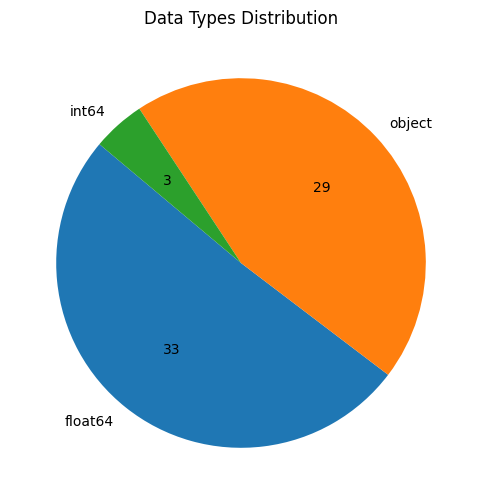

In [76]:
data_types_count = df.dtypes.value_counts()

plt.figure(figsize=(6, 6))
patches, texts, autotexts = plt.pie(data_types_count, labels=data_types_count.index, startangle=140, autopct='%1.1f%%')

for i, (label, count) in enumerate(data_types_count.items()):
    autotexts[i].set_text(f'{count}')  

plt.title('Data Types Distribution')
plt.show()

## NULL

In [77]:
msno.matrix(df)
plt.show()

: 

In [ ]:
df_zeros = combined_df.copy()
df_zeros.replace(0, np.nan, inplace=True)

msno.matrix(df)
plt.title('Missing and 0 Values Matrix (Copy)')
plt.show()

: 

In [ ]:
null_counts = df.isnull().sum()

null_counts_df = null_counts.reset_index()
null_counts_df.columns = ['Column', 'Null Count']


In [ ]:

pd.set_option('display.max_rows', 100)

null_counts_df


,Column,Null Count
0,YEAR,0
1,QUARTER,0
2,MONTH,0
3,DAY_OF_MONTH,0
4,DAY_OF_WEEK,0
5,FL_DATE,0
6,UNIQUE_CARRIER,0
7,AIRLINE_ID,0
8,CARRIER,0
9,TAIL_NUM,12750


5635978, 65

In [ ]:

pd.reset_option('display.max_rows')


### ! Removing Unnamed: 64

In [ ]:
df.drop(columns=['Unnamed: 64'], inplace=True)


### Zeros

In [ ]:
zero_counts = (df == 0).sum()

zero_counts_df = zero_counts.reset_index()
zero_counts_df.columns = ['Column', 'Null Count']

In [ ]:
pd.set_option('display.max_rows', 100)

zero_counts_df


,Column,Null Count
0,YEAR,0
1,QUARTER,0
2,MONTH,0
3,DAY_OF_MONTH,0
4,DAY_OF_WEEK,0
5,FL_DATE,0
6,UNIQUE_CARRIER,0
7,AIRLINE_ID,0
8,CARRIER,0
9,TAIL_NUM,0


## Columns Date

### Dates - YEAR

In [ ]:
df['YEAR'].unique()



array([2016, '2016', '16-03-04'], dtype=object)

In [ ]:
df['YEAR'].value_counts()

2016        5156028
2016         479949
16-03-04          1
Name: YEAR, dtype: int64

YEAR all are 2016

### Date - FL_DATE year

In [ ]:
df['FL_DATE']

0          2016-01-06
1          2016-01-07
2          2016-01-08
3          2016-01-09
4          2016-01-10
              ...    
5635973    2016-12-31
5635974    2016-12-31
5635975    2016-12-31
5635976    2016-12-31
5635977    2016-12-31
Name: FL_DATE, Length: 5635978, dtype: object

In [ ]:
df['FL_DATE'].dtype

dtype('O')

In [ ]:
def proportion_of_strings(column):
    total_count = len(column)
    string_count = column.apply(lambda x: isinstance(x, str)).sum()
    proportion = string_count / total_count
    return proportion

In [ ]:
# Calculate the proportion of strings in column FL_DATE
proportion_strings_D = proportion_of_strings(df['FL_DATE'])
print(f"Proportion of strings in column 'FL_DATE': {proportion_strings_D:.2%}")

Proportion of strings in column 'D': 100.00%


In [ ]:
def proportion_matching_regex(column, pattern):
    # Ensure the column is treated as string
    column = column.astype(str)
    # Check which values match the pattern
    matches = column.str.contains(pattern, regex=True)
    # Calculate the proportion of matches
    proportion = matches.mean()
    return proportion

In [ ]:
pattern = r'^\d\d\d\d-\d\d-\d\d$'

proportion_matching_D = proportion_matching_regex(df['FL_DATE'], pattern)
print(f"Proportion of values matching the pattern YYYY-MM-DD in column 'FL_DATE': {proportion_matching_D:.8%}")


Proportion of values matching the pattern YYYY-MM-DD in column 'FL_DATE': 100.00000000%


In [ ]:
# df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])

In [ ]:
df['FL_DATE_year'] = df['FL_DATE'].str[:4]


In [ ]:
df['FL_DATE_year'].value_counts()

2016    5635977
5059          1
Name: FL_DATE_year, dtype: int64

In [ ]:
df_filtered = df[df['FL_DATE_year'] == '5059']


In [ ]:
df_filtered


,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,TAIL_NUM,...,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,FL_DATE_year
1810646,16-03-04,EV,20366,EV,N707EV,5059,10397,1039705,30397,ATL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5059


### ! Removing problematic row

In [ ]:
df = df.loc[~df['FL_DATE'].str.startswith('5059')]


In [ ]:
df['FL_DATE_year'].value_counts()

2016    5635977
Name: FL_DATE_year, dtype: int64

### Date - MONTH

In [ ]:
df['MONTH'].value_counts()

3     596240
7     502457
8     498347
6     487637
5     479358
10    472626
12    460949
9     454878
11    450938
1     445827
2     423889
4     362831
Name: MONTH, dtype: int64

### Date - FL_DATE month

In [ ]:
if 'FL_DATE_month' in df.columns:
    df.drop(columns=['FL_DATE_month'], inplace=True)
df['FL_DATE_month'] = df['FL_DATE'].str[5:7].astype(int)
df

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,TAIL_NUM,...,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,FL_DATE_year,FL_DATE_month
0,2016,1,1,6,3,2016-01-06,AA,19805,AA,N4YBAA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,1
1,2016,1,1,7,4,2016-01-07,AA,19805,AA,N434AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,1
2,2016,1,1,8,5,2016-01-08,AA,19805,AA,N541AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,1
3,2016,1,1,9,6,2016-01-09,AA,19805,AA,N489AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,1
4,2016,1,1,10,7,2016-01-10,AA,19805,AA,N439AA,...,0.0,0.0,47.0,0.0,66.0,NaN,NaN,NaN,2016,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5635973,2016,4,12,31,6,2016-12-31,WN,19393,WN,N7703A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,12
5635974,2016,4,12,31,6,2016-12-31,WN,19393,WN,N7815L,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,12
5635975,2016,4,12,31,6,2016-12-31,WN,19393,WN,N967WN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,12
5635976,2016,4,12,31,6,2016-12-31,WN,19393,WN,N271LV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,12


In [ ]:
not_equal_month = df[df['MONTH'] != df['FL_DATE_month']]
not_equal_month

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,TAIL_NUM,...,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,FL_DATE_year,FL_DATE_month


### Date - DAY_OF_MONTH

In [ ]:
df['DAY_OF_MONTH'].value_counts()

18    173098
26    173066
22    172636
11    172620
15    172005
28    171605
2     170909
21    170655
14    170500
23    169990
19    169980
27    169906
16    169692
12    169257
17    169157
29    168907
8     168562
9     168200
1     167997
20    167914
13    167904
5     167524
7     167418
6     166762
10    166703
25    166009
4     164810
3     164026
24    161300
30    151985
31    104931
25     18088
15     17894
29     17791
22     17762
21     17606
28     17398
27     17249
18     17077
20     17059
24     16783
14     16641
26     16330
6      16285
19     16254
17     15656
3      15608
23     15571
13     15188
8      15041
30     14990
1      14880
12     14874
4      14797
7      14741
11     14618
16     14581
5      14326
2      14002
10     13899
9      12570
31      4390
Name: DAY_OF_MONTH, dtype: int64

In [ ]:
def convert_to_int(column):
    return pd.to_numeric(column).astype('Int64')

In [ ]:
df['DAY_OF_MONTH'] = convert_to_int(df['DAY_OF_MONTH'])
sorted(df['DAY_OF_MONTH'].unique())

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31]

### Date - FL_DATE_day_of_month

In [ ]:
if 'FL_DATE_day_of_month' in df.columns:
    df.drop(columns=['FL_DATE_day_of_month'], inplace=True)
df['FL_DATE_day_of_month'] = df['FL_DATE'].str[8:10].astype(int)
df

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,TAIL_NUM,...,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,FL_DATE_year,FL_DATE_month,FL_DATE_day_of_month
0,2016,1,1,6,3,2016-01-06,AA,19805,AA,N4YBAA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,1,6
1,2016,1,1,7,4,2016-01-07,AA,19805,AA,N434AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,1,7
2,2016,1,1,8,5,2016-01-08,AA,19805,AA,N541AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,1,8
3,2016,1,1,9,6,2016-01-09,AA,19805,AA,N489AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,1,9
4,2016,1,1,10,7,2016-01-10,AA,19805,AA,N439AA,...,0.0,47.0,0.0,66.0,NaN,NaN,NaN,2016,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5635973,2016,4,12,31,6,2016-12-31,WN,19393,WN,N7703A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,12,31
5635974,2016,4,12,31,6,2016-12-31,WN,19393,WN,N7815L,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,12,31
5635975,2016,4,12,31,6,2016-12-31,WN,19393,WN,N967WN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,12,31
5635976,2016,4,12,31,6,2016-12-31,WN,19393,WN,N271LV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,12,31


In [ ]:
not_equal_day_of_month = df[df['DAY_OF_MONTH'] != df['FL_DATE_day_of_month']]
not_equal_day_of_month

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,TAIL_NUM,...,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,FL_DATE_year,FL_DATE_month,FL_DATE_day_of_month


### ! Convert FL_DATE from str to datetime

In [ ]:

df.loc[:, 'FL_DATE'] = pd.to_datetime(df['FL_DATE'])

### Date - QUARTER

In [ ]:
df

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,TAIL_NUM,...,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,Unnamed: 64
0,2016,4,12,3,6,2016-12-03,DL,19790,DL,N996AT,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016,4,12,3,6,2016-12-03,DL,19790,DL,N969DL,...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016,4,12,3,6,2016-12-03,DL,19790,DL,N954DL,...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016,4,12,3,6,2016-12-03,DL,19790,DL,N819DX,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016,4,12,3,6,2016-12-03,DL,19790,DL,N331NB,...,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460944,2016,4,12,31,6,2016-12-31,WN,19393,WN,N7703A,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
460945,2016,4,12,31,6,2016-12-31,WN,19393,WN,N7815L,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
460946,2016,4,12,31,6,2016-12-31,WN,19393,WN,N967WN,...,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
460947,2016,4,12,31,6,2016-12-31,WN,19393,WN,N271LV,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df['QUARTER'].unique()

array([1, '2', '1', 2, 3, 4], dtype=object)

In [ ]:
df['QUARTER'] = convert_to_int(df['QUARTER'])
df['QUARTER'].unique()

<IntegerArray>
[1, 2, 3, 4]
Length: 4, dtype: Int64

### Date - FL_DATE quarter

In [ ]:
if 'FL_DATE_quarter' in df.columns:
    df.drop(columns=['FL_DATE_quarter'], inplace=True)
df['FL_DATE_quarter'] = df['FL_DATE'].dt.quarter
df

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,TAIL_NUM,...,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,Unnamed: 64,FL_DATE_quarter
0,2016,1,1,6,3,2016-01-06,AA,19805,AA,N4YBAA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,2016,1,1,7,4,2016-01-07,AA,19805,AA,N434AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,2016,1,1,8,5,2016-01-08,AA,19805,AA,N541AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,2016,1,1,9,6,2016-01-09,AA,19805,AA,N489AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,2016,1,1,10,7,2016-01-10,AA,19805,AA,N439AA,...,0.0,0.0,47.0,0.0,66.0,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5635973,2016,4,12,31,6,2016-12-31,WN,19393,WN,N7703A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
5635974,2016,4,12,31,6,2016-12-31,WN,19393,WN,N7815L,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
5635975,2016,4,12,31,6,2016-12-31,WN,19393,WN,N967WN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
5635976,2016,4,12,31,6,2016-12-31,WN,19393,WN,N271LV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4


In [ ]:
not_equal_quarter = df[df['QUARTER'] != df['FL_DATE_quarter']]
not_equal_quarter

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,TAIL_NUM,...,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,Unnamed: 64,FL_DATE_quarter


### Date - DAY_OF_WEEK

In [ ]:
df['DAY_OF_WEEK'].unique()

array([3, 4, 5, 6, 7, 1, 2, '7', '1', '2', '5', '6', '3', '4'],
      dtype=object)

In [ ]:
df['DAY_OF_WEEK'] = convert_to_int(df['DAY_OF_WEEK'])
df['DAY_OF_WEEK'].unique()

<IntegerArray>
[3, 4, 5, 6, 7, 1, 2]
Length: 7, dtype: Int64

### Date - FL_DATE day_of_week

In [ ]:
if 'FL_DATE_day_of_week' in df.columns:
    df.drop(columns=['FL_DATE_day_of_week'], inplace=True)
df['FL_DATE_day_of_week'] = df['FL_DATE'].dt.dayofweek + 1
df

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,TAIL_NUM,...,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,Unnamed: 64,FL_DATE_quarter,FL_DATE_day_of_week
0,2016,1,1,6,3,2016-01-06,AA,19805,AA,N4YBAA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3
1,2016,1,1,7,4,2016-01-07,AA,19805,AA,N434AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,4
2,2016,1,1,8,5,2016-01-08,AA,19805,AA,N541AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,5
3,2016,1,1,9,6,2016-01-09,AA,19805,AA,N489AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,6
4,2016,1,1,10,7,2016-01-10,AA,19805,AA,N439AA,...,0.0,47.0,0.0,66.0,NaN,NaN,NaN,NaN,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5635973,2016,4,12,31,6,2016-12-31,WN,19393,WN,N7703A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,6
5635974,2016,4,12,31,6,2016-12-31,WN,19393,WN,N7815L,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,6
5635975,2016,4,12,31,6,2016-12-31,WN,19393,WN,N967WN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,6
5635976,2016,4,12,31,6,2016-12-31,WN,19393,WN,N271LV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,6


In [ ]:
not_equal_day_of_week = df[df['DAY_OF_WEEK'] != df['FL_DATE_day_of_week']]
not_equal_day_of_week

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,TAIL_NUM,...,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,Unnamed: 64,FL_DATE_quarter,FL_DATE_day_of_week


### ! Droping Date columns

In [ ]:
columns_to_drop = ['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE_year', 'FL_DATE_quarter', 'FL_DATE_month', 'FL_DATE_day_of_month', 'FL_DATE_day_of_week']

existing_drop = [col for col in columns_to_drop if col in df.columns]

if existing_drop:
    df.drop(columns=existing_drop, inplace=True)
df

,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,...,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME
0,2016-01-06,AA,19805,AA,N4YBAA,43,11298,1129804,30194,DFW,...,986.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-07,AA,19805,AA,N434AA,43,11298,1129804,30194,DFW,...,986.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-08,AA,19805,AA,N541AA,43,11298,1129804,30194,DFW,...,986.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-09,AA,19805,AA,N489AA,43,11298,1129804,30194,DFW,...,986.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-01-10,AA,19805,AA,N439AA,43,11298,1129804,30194,DFW,...,986.0,4.0,0.0,0.0,47.0,0.0,66.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5635973,2016-12-31,WN,19393,WN,N7703A,1077,15376,1537602,30436,TUS,...,451.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5635974,2016-12-31,WN,19393,WN,N7815L,1345,15376,1537602,30436,TUS,...,451.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5635975,2016-12-31,WN,19393,WN,N967WN,1176,15376,1537602,30436,TUS,...,1440.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5635976,2016-12-31,WN,19393,WN,N271LV,865,15376,1537602,30436,TUS,...,368.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Columns AIRLINE, FLIGHT IDs

### UNIQUE_CARRIER

In [ ]:
df['UNIQUE_CARRIER'].unique()



array(['AA', 'AS', 'B6', 'DL', 'F9', 'HA', 'NK', 'EV', 'OO', 'UA', 'VX',
       'WN'], dtype=object)

In [ ]:
df['UNIQUE_CARRIER'].isna().sum()

0

### AIRLINE_ID

In [ ]:
df['AIRLINE_ID'].isna().sum()


0

In [ ]:
df['AIRLINE_ID'].dtype

dtype('int64')

In [ ]:
max_date = df['AIRLINE_ID'].max()
min_date = df['AIRLINE_ID'].min()
print(f"MAX: {max_date}")
print(f"MIN: {min_date}")

MAX: 21171
MIN: 19393


In [ ]:
df['AIRLINE_ID'].nunique()

12

In [ ]:
df['AIRLINE_ID'].unique()

array([19805, 19930, 20409, 19790, 20436, 19690, 20416, 20366, 20304,
       19977, 21171, 19393])

### CARRIER

In [ ]:
df['CARRIER'].unique()



array(['AA', 'AS', 'B6', 'DL', 'F9', 'HA', 'NK', 'EV', 'OO', 'UA', 'VX',
       'WN'], dtype=object)

In [ ]:
df['CARRIER'].nunique()



12

In [ ]:
not_equal_carrier = df[df['CARRIER'] != df['UNIQUE_CARRIER']]
not_equal_carrier

,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,...,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME


CARRIER and UNIQUE_CARRIER are the same

### ! Droping UNIQUE_CARRIER

In [ ]:
if 'UNIQUE_CARRIER' in df.columns:
    df.drop(columns=['UNIQUE_CARRIER'], inplace=True)
df.shape

(5635977, 58)

### TAIL_NUM

In [ ]:
df['TAIL_NUM'].isna().sum()

12750

In [ ]:
df['TAIL_NUM'].nunique()

5035

In [ ]:
df['TAIL_NUM'].dtype

dtype('O')

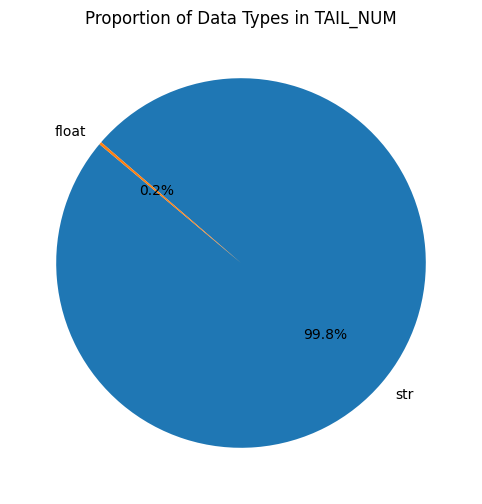

In [ ]:
def get_type(value):
    return type(value).__name__

type_series = df['TAIL_NUM'].apply(get_type)


# Calculate the proportion of each type
type_proportions = type_series.value_counts(normalize=True)

# Plotting the pie chart
plt.figure(figsize=(8, 6))
type_proportions.plot.pie(autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Data Types in TAIL_NUM')
plt.ylabel('')  # Hide the y-label

# Display the pie chart
plt.show()

# Remove the temporary variable 'type_series'
del type_series


In [ ]:
df['TAIL_NUM']

0          N4YBAA
1          N434AA
2          N541AA
3          N489AA
4          N439AA
            ...  
5635973    N7703A
5635974    N7815L
5635975    N967WN
5635976    N271LV
5635977    N762SW
Name: TAIL_NUM, Length: 5635977, dtype: object

In [ ]:
def filter_by_type(df, column_name, dtype):
    return df[df[column_name].apply(lambda x: isinstance(x, dtype))]

# Example usage: Show only float values from 'TAIL_NUM' column
floats_only = filter_by_type(df, 'TAIL_NUM', float)
tail_num_float_no_nan = floats_only.dropna(subset=['TAIL_NUM'])
print(tail_num_float_no_nan)
del floats_only
del tail_num_float_no_nan

Empty DataFrame
Columns: [FL_DATE, AIRLINE_ID, CARRIER, TAIL_NUM, FL_NUM, ORIGIN_AIRPORT_ID, ORIGIN_AIRPORT_SEQ_ID, ORIGIN_CITY_MARKET_ID, ORIGIN, ORIGIN_CITY_NAME, ORIGIN_STATE_ABR, ORIGIN_STATE_FIPS, ORIGIN_STATE_NM, ORIGIN_WAC, DEST_AIRPORT_ID, DEST_AIRPORT_SEQ_ID, DEST_CITY_MARKET_ID, DEST, DEST_CITY_NAME, DEST_STATE_ABR, DEST_STATE_FIPS, DEST_STATE_NM, DEST_WAC, CRS_DEP_TIME, DEP_TIME, DEP_DELAY, DEP_DELAY_NEW, DEP_DEL15, DEP_DELAY_GROUP, DEP_TIME_BLK, TAXI_OUT, WHEELS_OFF, WHEELS_ON, TAXI_IN, CRS_ARR_TIME, ARR_TIME, ARR_DELAY, ARR_DELAY_NEW, ARR_DEL15, ARR_DELAY_GROUP, ARR_TIME_BLK, CANCELLED, CANCELLATION_CODE, DIVERTED, CRS_ELAPSED_TIME, ACTUAL_ELAPSED_TIME, AIR_TIME, FLIGHTS, DISTANCE, DISTANCE_GROUP, CARRIER_DELAY, WEATHER_DELAY, NAS_DELAY, SECURITY_DELAY, LATE_AIRCRAFT_DELAY, FIRST_DEP_TIME, TOTAL_ADD_GTIME, LONGEST_ADD_GTIME]
Index: []

[0 rows x 58 columns]


### fl_num

In [ ]:
df['FL_NUM'].isna().sum()

0

In [ ]:
df['FL_NUM'].nunique()

12922

In [ ]:
df['FL_NUM'].dtype

dtype('O')

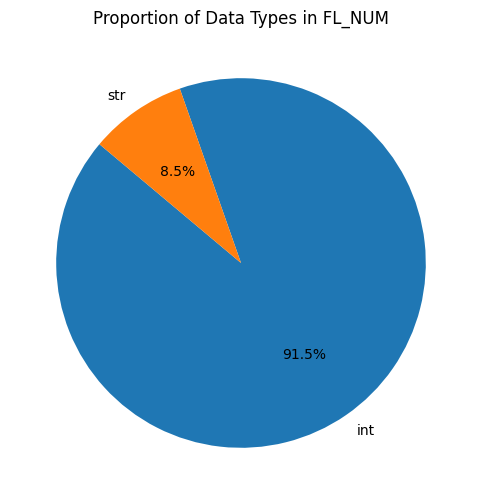

In [ ]:
def get_type(value):
    return type(value).__name__

type_series = df['FL_NUM'].apply(get_type)

type_proportions = type_series.value_counts(normalize=True)

plt.figure(figsize=(8, 6))
type_proportions.plot.pie(autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Data Types in FL_NUM')
plt.ylabel('')
plt.show()

del type_series


In [ ]:

int_only = filter_by_type(df, 'FL_NUM', int)

print(int_only)
del int_only

           FL_DATE  AIRLINE_ID CARRIER TAIL_NUM FL_NUM ORIGIN_AIRPORT_ID  \
0       2016-01-06       19805      AA   N4YBAA     43             11298   
1       2016-01-07       19805      AA   N434AA     43             11298   
2       2016-01-08       19805      AA   N541AA     43             11298   
3       2016-01-09       19805      AA   N489AA     43             11298   
4       2016-01-10       19805      AA   N439AA     43             11298   
...            ...         ...     ...      ...    ...               ...   
5635973 2016-12-31       19393      WN   N7703A   1077             15376   
5635974 2016-12-31       19393      WN   N7815L   1345             15376   
5635975 2016-12-31       19393      WN   N967WN   1176             15376   
5635976 2016-12-31       19393      WN   N271LV    865             15376   
5635977 2016-12-31       19393      WN   N762SW   6775             15376   

         ORIGIN_AIRPORT_SEQ_ID ORIGIN_CITY_MARKET_ID ORIGIN  \
0                      1

In [ ]:

int_only = filter_by_type(df, 'FL_NUM', int)

max_date = int_only['FL_NUM'].max()
min_date = int_only['FL_NUM'].min()
print(f"MAX: {max_date}")
print(f"MIN: {min_date}")
del int_only

MAX: 8402
MIN: 1


In [ ]:
def filter_by_type(df, column_name, dtype):
    return df[df[column_name].apply(lambda x: isinstance(x, dtype))]

str_only = filter_by_type(df, 'FL_NUM', str)
# display(str_only)

num_pattern = r'^\d+$'
non_matching_rows = str_only[~str_only['FL_NUM'].str.match(num_pattern)]
display(non_matching_rows)

del str_only

,FL_DATE,AIRLINE_ID,CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,...,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME
1802953,2016-04-29,20409,B6,N644JB,582700-1759,15.00,1753,1816,4.00,1829,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### ! Remove FL_NUM problematic row

In [ ]:
df.drop(non_matching_rows.index, inplace=True)

### ! FL_NUM str to int

In [ ]:
def filter_by_type(df, column_name, dtype):
    return df[df[column_name].apply(lambda x: isinstance(x, dtype))]

str_only = filter_by_type(df, 'FL_NUM', str)

to_int = str_only['FL_NUM'].astype(int)

max_ = to_int.max()
min_ = to_int.min()
print(f"MAX: {max_}")
print(f"MIN: {min_}")

del to_int
del str_only


MAX: 7439
MIN: 1


In [ ]:
df['FL_NUM'] = df['FL_NUM'].astype(int)

In [ ]:
str_only = filter_by_type(df, 'FL_NUM', str)

display(str_only)


del str_only

,FL_DATE,AIRLINE_ID,CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,...,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME


## ORIGIN

### ORIGIN_AIRPORT_ID

In [ ]:
df['ORIGIN_AIRPORT_ID'].isna().sum()

0

In [ ]:
df['ORIGIN_AIRPORT_ID'].nunique()

609

In [ ]:
df['ORIGIN_AIRPORT_ID'].dtype

dtype('O')

In [ ]:


unique_types = df['ORIGIN_AIRPORT_ID'].apply(get_type).unique()
unique_types

array(['int'], dtype=object)

In [ ]:
df['ORIGIN_AIRPORT_ID']

0          11298
1          11298
2          11298
3          11298
4          11298
           ...  
5635973    15376
5635974    15376
5635975    15376
5635976    15376
5635977    15376
Name: ORIGIN_AIRPORT_ID, Length: 5635976, dtype: object

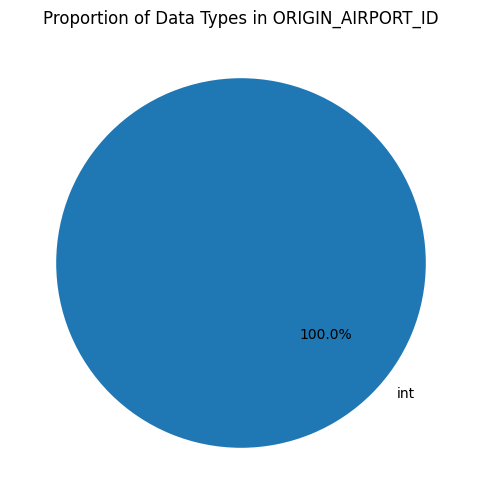

In [ ]:
def get_type(value):
    return type(value).__name__

type_series = df['ORIGIN_AIRPORT_ID'].apply(get_type)

type_proportions = type_series.value_counts(normalize=True)

plt.figure(figsize=(8, 6))
type_proportions.plot.pie(autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Data Types in ORIGIN_AIRPORT_ID')
plt.ylabel('')
plt.show()

del type_series


In [ ]:
str_only = filter_by_type(df, 'ORIGIN_AIRPORT_ID', str)

num_pattern = r'^\d+$'
non_matching_rows = str_only[~str_only['ORIGIN_AIRPORT_ID'].str.match(num_pattern)]
display(non_matching_rows)


del str_only

,FL_DATE,AIRLINE_ID,CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,...,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME


In [ ]:
str_only = filter_by_type(df, 'ORIGIN_AIRPORT_ID', str)

to_int = str_only['ORIGIN_AIRPORT_ID'].astype(int)

max_ = to_int.max()
min_ = to_int.min()
print(f"MAX: {max_}")
print(f"MIN: {min_}")

del to_int
del str_only


MAX: 16218
MIN: 10135


### ! ORIGIN_AIRPORT_ID str to int

In [ ]:
df['ORIGIN_AIRPORT_ID'] = df['ORIGIN_AIRPORT_ID'].astype(int)

In [ ]:

unique_types = df['ORIGIN_AIRPORT_ID'].apply(get_type).unique()
unique_types

array(['int'], dtype=object)

In [ ]:
df['ORIGIN_AIRPORT_ID'].dtype

dtype('int64')

In [ ]:
df['ORIGIN_AIRPORT_ID'].nunique()

313

### ORIGIN_AIRPORT_SEQ_ID

In [ ]:
df['ORIGIN_AIRPORT_SEQ_ID'].isna().sum()

0

In [ ]:
df['ORIGIN_AIRPORT_SEQ_ID'].nunique()

322

In [ ]:
df['ORIGIN_AIRPORT_SEQ_ID'].dtype

dtype('int64')

In [ ]:
print('MIN:', df['ORIGIN_AIRPORT_SEQ_ID'].min())
print('MAX:', df['ORIGIN_AIRPORT_SEQ_ID'].max())

NameError: name 'df' is not defined

In [ ]:

# Function to check if the ORIGIN_AIRPORT_SEQ_ID matches the rule using arithmetic
def does_not_match(row):
    origin_airport_id = row['ORIGIN_AIRPORT_ID']
    origin_airport_seq_id = row['ORIGIN_AIRPORT_SEQ_ID']
    
    # Convert both to string to perform the necessary checks
    origin_airport_id_str = str(origin_airport_id)
    origin_airport_seq_id_str = str(origin_airport_seq_id)
    
    # Check if ORIGIN_AIRPORT_SEQ_ID starts with ORIGIN_AIRPORT_ID and has exactly two more digits
    return not (origin_airport_seq_id_str.startswith(origin_airport_id_str) and 
                len(origin_airport_seq_id_str) == len(origin_airport_id_str) + 2)

# Apply the function to get the boolean mask
mask = df.apply(does_not_match, axis=1)

# Filter the DataFrame with the mask
non_matching_rows = df[mask]

display(non_matching_rows)

,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,...,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,Unnamed: 64
1802953,2016-04-29,B6,20409,B6,N644JB,582700-1759,15.00,1753,1816,4.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.columns.to_list()

['FL_DATE',
 'UNIQUE_CARRIER',
 'AIRLINE_ID',
 'CARRIER',
 'TAIL_NUM',
 'FL_NUM',
 'ORIGIN_AIRPORT_ID',
 'ORIGIN_AIRPORT_SEQ_ID',
 'ORIGIN_CITY_MARKET_ID',
 'ORIGIN',
 'ORIGIN_CITY_NAME',
 'ORIGIN_STATE_ABR',
 'ORIGIN_STATE_FIPS',
 'ORIGIN_STATE_NM',
 'ORIGIN_WAC',
 'DEST_AIRPORT_ID',
 'DEST_AIRPORT_SEQ_ID',
 'DEST_CITY_MARKET_ID',
 'DEST',
 'DEST_CITY_NAME',
 'DEST_STATE_ABR',
 'DEST_STATE_FIPS',
 'DEST_STATE_NM',
 'DEST_WAC',
 'CRS_DEP_TIME',
 'DEP_TIME',
 'DEP_DELAY',
 'DEP_DELAY_NEW',
 'DEP_DEL15',
 'DEP_DELAY_GROUP',
 'DEP_TIME_BLK',
 'TAXI_OUT',
 'WHEELS_OFF',
 'WHEELS_ON',
 'TAXI_IN',
 'CRS_ARR_TIME',
 'ARR_TIME',
 'ARR_DELAY',
 'ARR_DELAY_NEW',
 'ARR_DEL15',
 'ARR_DELAY_GROUP',
 'ARR_TIME_BLK',
 'CANCELLED',
 'CANCELLATION_CODE',
 'DIVERTED',
 'CRS_ELAPSED_TIME',
 'ACTUAL_ELAPSED_TIME',
 'AIR_TIME',
 'FLIGHTS',
 'DISTANCE',
 'DISTANCE_GROUP',
 'CARRIER_DELAY',
 'WEATHER_DELAY',
 'NAS_DELAY',
 'SECURITY_DELAY',
 'LATE_AIRCRAFT_DELAY',
 'FIRST_DEP_TIME',
 'TOTAL_ADD_GTIME',
 'LON

### ORIGIN_CITY_MARKET_ID

In [ ]:
df['ORIGIN_CITY_MARKET_ID'].isna().sum()

0

In [ ]:
df['ORIGIN_CITY_MARKET_ID'].nunique()

567

In [ ]:
df['ORIGIN_CITY_MARKET_ID'].dtype

dtype('O')

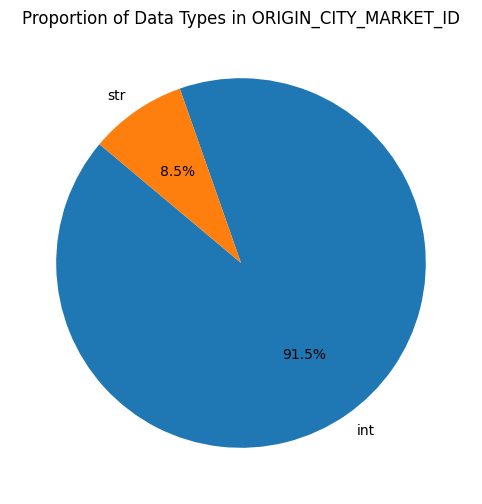

In [ ]:
def get_type(value):
    return type(value).__name__

type_series = df['ORIGIN_CITY_MARKET_ID'].apply(get_type)

type_proportions = type_series.value_counts(normalize=True)

plt.figure(figsize=(8, 6))
type_proportions.plot.pie(autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Data Types in ORIGIN_CITY_MARKET_ID')
plt.ylabel('')
plt.show()

del type_series


In [ ]:
def filter_by_type(df, column_name, dtype):
    return df[df[column_name].apply(lambda x: isinstance(x, dtype))]

str_only = filter_by_type(df, 'ORIGIN_CITY_MARKET_ID', str)

num_pattern = r'^\d+$'
non_matching_rows = str_only[~str_only['ORIGIN_CITY_MARKET_ID'].str.match(num_pattern)]
display(non_matching_rows)


del str_only

,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,...,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,Unnamed: 64


In [ ]:
str_only = filter_by_type(df, 'ORIGIN_CITY_MARKET_ID', str)

to_int = str_only['ORIGIN_CITY_MARKET_ID'].astype(int)

max_ = to_int.max()
min_ = to_int.min()
print(f"MAX: {max_}")
print(f"MIN: {min_}")

del to_int
del str_only


MAX: 35991
MIN: 1816


### ! ORIGIN_CITY_MARKET_ID str to int

In [ ]:
df['ORIGIN_CITY_MARKET_ID'] = df['ORIGIN_CITY_MARKET_ID'].astype(int)

### Columns ORIGIN

In [ ]:
df['ORIGIN'].isna().sum()

0

In [ ]:
df['ORIGIN'].nunique()

313

In [ ]:
df['ORIGIN'].dtype

dtype('O')

In [ ]:
unique_types = df['ORIGIN'].apply(get_type).unique()
unique_types

array(['str'], dtype=object)

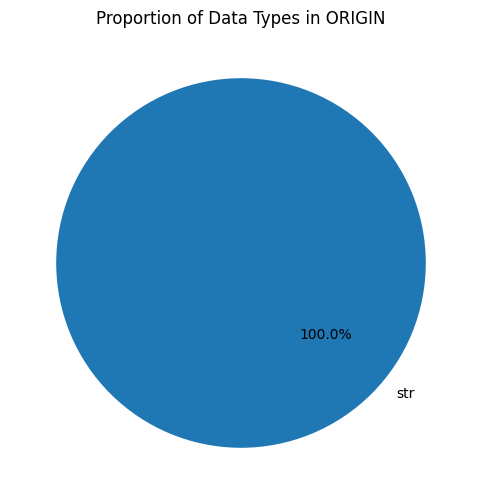

In [ ]:
def get_type(value):
    return type(value).__name__

type_series = df['ORIGIN'].apply(get_type)

type_proportions = type_series.value_counts(normalize=True)

plt.figure(figsize=(8, 6))
type_proportions.plot.pie(autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Data Types in ORIGIN')
plt.ylabel('')
plt.show()

del type_series


In [ ]:
# Function to filter by type
def filter_by_type(df, column_name, dtype):
    return df[df[column_name].apply(lambda x: isinstance(x, dtype))]

# Get values that are not of type str
not_str_only = df[~df['ORIGIN'].apply(lambda x: isinstance(x, str))]

not_str_only

,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,...,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,Unnamed: 64


In [ ]:


# Function to get the type of each element in the column, handling NaN explicitly
def get_type(value):
    if pd.isna(value):
        return 'NoneType'
    return type(value).__name__

# Apply the function to the column and get unique types
unique_types = df['ORIGIN'].apply(get_type).unique()

# Display the unique types
print(f"Unique data types in 'ORIGIN' column: {unique_types}")

Unique data types in 'ORIGIN' column: ['str']


In [ ]:
df['ORIGIN'].unique()

array(['DFW', 'DTW', 'SEA', 'JFK', 'SJC', 'ORD', 'PHX', 'STL', 'LAX',
       'MCO', 'DEN', 'MIA', 'KOA', 'IAH', 'AUS', 'LAS', 'SLC', 'TUS',
       'STT', 'BOS', 'FLL', 'SFO', 'OGG', 'TPA', 'SNA', 'OKC', 'HNL',
       'PHL', 'LGA', 'RDU', 'DCA', 'RIC', 'ATL', 'LBB', 'CLT', 'ELP',
       'SAN', 'BNA', 'JAC', 'SMF', 'EWR', 'IAD', 'LIH', 'SJU', 'ABQ',
       'ORF', 'JAX', 'MSY', 'SAT', 'MCI', 'GUC', 'IND', 'PDX', 'BWI',
       'MSP', 'MKE', 'TUL', 'ONT', 'RSW', 'RNO', 'DSM', 'MFE', 'PSP',
       'OMA', 'EGE', 'PBI', 'SDF', 'PIT', 'FAT', 'DAY', 'STX', 'COS',
       'CMH', 'MTJ', 'HDN', 'BDL', 'MEM', 'CLE', 'HOU', 'BOI', 'OAK',
       'GEG', 'ANC', 'BUF', 'SYR', 'ALB', 'PVD', 'ROC', 'ILM', 'ICT',
       'PWM', 'GSO', 'CHS', 'MDT', 'BHM', 'ADQ', 'BET', 'BRW', 'SCC',
       'FAI', 'JNU', 'KTN', 'YAK', 'CDV', 'SIT', 'PSG', 'WRG', 'OME',
       'OTZ', 'BUR', 'BLI', 'ADK', 'SWF', 'LGB', 'PSE', 'BQN', 'HPN',
       'SAV', 'SRQ', 'BTV', 'ORH', 'DAB', 'CVG', 'BIS', 'AVL', 'GRR',
       'FNT', 'MYR',

In [ ]:
# Function to check if a value is exactly three uppercase letters
def is_not_three_uppercase_letters(value):
    if pd.isna(value):
        return True
    return not bool(pd.Series(value).str.match(r'^[A-Z]{3}$').iloc[0])

# Apply the function to get the boolean mask
mask = df['ORIGIN'].apply(is_not_three_uppercase_letters)

# Filter the DataFrame with the mask
non_matching_rows = df[mask]
non_matching_rows

,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,...,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,Unnamed: 64


In [ ]:
df['ORIGIN'].drop_duplicates().sort_values().head(50)

124418     ABE
2386508    ABI
6153       ABQ
176372     ABR
320976     ABY
2289114    ACK
130894     ACT
161939     ACV
125553     ACY
75518      ADK
70100      ADQ
289026     AEX
108031     AGS
2353321    AKN
35946      ALB
136536     AMA
35850      ANC
176495     APN
134815     ASE
3510       ATL
108876     ATW
614        AUS
107897     AVL
109346     AVP
146110     AZO
25759      BDL
70102      BET
2097279    BFF
136554     BFL
179222     BGM
313170     BGR
50201      BHM
107964     BIL
107880     BIS
176630     BJI
70331      BLI
124419     BMI
4456       BNA
35392      BOI
1013       BOS
288848     BPT
316634     BQK
84617      BQN
179530     BRD
131381     BRO
70106      BRW
181771     BTM
140632     BTR
84925      BTV
35874      BUF
Name: ORIGIN, dtype: object

### ORIGIN_CITY_NAME

In [ ]:
df['ORIGIN_CITY_NAME'].dtype

dtype('O')

In [ ]:
unique_types = df['ORIGIN'].apply(get_type).unique()
unique_types

array(['str'], dtype=object)

In [ ]:
df['ORIGIN_CITY_NAME'].isna().sum()

0

In [ ]:
df['ORIGIN_CITY_NAME'].nunique()

308

In [ ]:
df['ORIGIN_CITY_NAME'].unique()


array(['Dallas/Fort Worth, TX', 'Detroit, MI', 'Seattle, WA',
       'New York, NY', 'San Jose, CA', 'Chicago, IL', 'Phoenix, AZ',
       'St. Louis, MO', 'Los Angeles, CA', 'Orlando, FL', 'Denver, CO',
       'Miami, FL', 'Kona, HI', 'Houston, TX', 'Austin, TX',
       'Las Vegas, NV', 'Salt Lake City, UT', 'Tucson, AZ',
       'Charlotte Amalie, VI', 'Boston, MA', 'Fort Lauderdale, FL',
       'San Francisco, CA', 'Kahului, HI', 'Tampa, FL', 'Santa Ana, CA',
       'Oklahoma City, OK', 'Honolulu, HI', 'Philadelphia, PA',
       'Raleigh/Durham, NC', 'Washington, DC', 'Richmond, VA',
       'Atlanta, GA', 'Lubbock, TX', 'Charlotte, NC', 'El Paso, TX',
       'San Diego, CA', 'Nashville, TN', 'Jackson, WY', 'Sacramento, CA',
       'Newark, NJ', 'Lihue, HI', 'San Juan, PR', 'Albuquerque, NM',
       'Norfolk, VA', 'Jacksonville, FL', 'New Orleans, LA',
       'San Antonio, TX', 'Kansas City, MO', 'Gunnison, CO',
       'Indianapolis, IN', 'Portland, OR', 'Baltimore, MD',
       'Minnea

In [ ]:
# Function to check if a value matches the "City, State" pattern
def is_not_city_state_pattern(value):
    if pd.isna(value):
        return True
    return not bool(pd.Series(value).str.match(r'^[A-Za-z ]+, [A-Z]{2}$').iloc[0])

# Apply the function to get the boolean mask
mask = df['ORIGIN_CITY_NAME'].apply(is_not_city_state_pattern)

# Filter the DataFrame with the mask and get unique values
non_matching_values = df[mask]['ORIGIN_CITY_NAME'].unique()

# Display the unique values that don't match the pattern
print("Unique values that do not match the 'City, State' pattern:")
print(non_matching_values)

Unique values that do not match the 'City, State' pattern:
['Dallas/Fort Worth, TX' 'St. Louis, MO' 'Raleigh/Durham, NC'
 'Mission/McAllen/Edinburg, TX' 'West Palm Beach/Palm Beach, FL'
 'Montrose/Delta, CO' 'Greensboro/High Point, NC'
 'Newburgh/Poughkeepsie, NY' 'Sarasota/Bradenton, FL'
 'Bismarck/Mandan, ND' 'Jackson/Vicksburg, MS' 'Gulfport/Biloxi, MS'
 'Bristol/Johnson City/Kingsport, TN' 'Scranton/Wilkes-Barre, PA'
 'St. Augustine, FL' 'Newport News/Williamsburg, VA'
 'Allentown/Bethlehem/Easton, PA' 'Bloomington/Normal, IL'
 'Charleston/Dunbar, WV' 'Midland/Odessa, TX'
 'Pasco/Kennewick/Richland, WA' 'Saginaw/Bay City/Midland, MI'
 'Sun Valley/Hailey/Ketchum, ID' 'Cedar Rapids/Iowa City, IA'
 'Hancock/Houghton, MI' 'St. George, UT' 'Bend/Redmond, OR'
 'Arcata/Eureka, CA' 'Ithaca/Cortland, NY' 'Sault Ste. Marie, MI'
 'Iron Mountain/Kingsfd, MI' 'North Bend/Coos Bay, OR'
 'Hattiesburg/Laurel, MS' 'Beaumont/Port Arthur, TX'
 'Lawton/Fort Sill, OK' 'College Station/Bryan, TX'
 'Harl

 ### 'ORIGIN_STATE_ABR'
 

In [ ]:
df['ORIGIN_STATE_ABR'].dtype

dtype('O')

In [ ]:
df['ORIGIN_STATE_ABR'].isna().sum()

0

In [ ]:
df['ORIGIN_STATE_ABR'].nunique()


52

In [ ]:
df['ORIGIN_STATE_ABR'].unique()

array(['TX', 'MI', 'WA', 'NY', 'CA', 'IL', 'AZ', 'MO', 'FL', 'CO', 'HI',
       'NV', 'UT', 'VI', 'MA', 'OK', 'PA', 'NC', 'VA', 'GA', 'TN', 'WY',
       'NJ', 'PR', 'NM', 'LA', 'IN', 'OR', 'MD', 'MN', 'WI', 'IA', 'NE',
       'KY', 'OH', 'CT', 'ID', 'AK', 'RI', 'KS', 'ME', 'SC', 'AL', 'VT',
       'ND', 'MS', 'MT', 'AR', 'SD', 'WV', 'TT', 'NH'], dtype=object)

### 'ORIGIN_STATE_FIPS',
 

In [ ]:
df['ORIGIN_STATE_FIPS'].isna().sum()

0

In [ ]:
df['ORIGIN_STATE_FIPS'].dtype

dtype('float64')

In [ ]:
df['ORIGIN_STATE_FIPS'].nunique()   

52

In [ ]:
df['ORIGIN_STATE_FIPS'].unique()

array([48., 26., 53., 36.,  6., 17.,  4., 29., 12.,  8., 15., 32., 49.,
       78., 25., 40., 42., 37., 51., 13., 47., 56., 34., 72., 35., 22.,
       18., 41., 24., 27., 55., 19., 31., 21., 39.,  9., 16.,  2., 44.,
       20., 23., 45.,  1., 50., 38., 28., 30.,  5., 46., 54., 75., 33.])

### ! 'ORIGIN_STATE_FIPS' float to int

In [ ]:
df['ORIGIN_STATE_FIPS'] = df['ORIGIN_STATE_FIPS'].astype(int)
df['ORIGIN_STATE_FIPS'].dtype


dtype('int64')

### 'ORIGIN_STATE_NM',


In [ ]:
df['ORIGIN_STATE_NM'].dtype

dtype('O')

In [ ]:
df['ORIGIN_STATE_NM'].apply(get_type).unique()

array(['str'], dtype=object)

In [ ]:
df['ORIGIN_STATE_NM'].nunique()

52

In [ ]:
df['ORIGIN_STATE_NM'].unique()

array(['Texas', 'Michigan', 'Washington', 'New York', 'California',
       'Illinois', 'Arizona', 'Missouri', 'Florida', 'Colorado', 'Hawaii',
       'Nevada', 'Utah', 'U.S. Virgin Islands', 'Massachusetts',
       'Oklahoma', 'Pennsylvania', 'North Carolina', 'Virginia',
       'Georgia', 'Tennessee', 'Wyoming', 'New Jersey', 'Puerto Rico',
       'New Mexico', 'Louisiana', 'Indiana', 'Oregon', 'Maryland',
       'Minnesota', 'Wisconsin', 'Iowa', 'Nebraska', 'Kentucky', 'Ohio',
       'Connecticut', 'Idaho', 'Alaska', 'Rhode Island', 'Kansas',
       'Maine', 'South Carolina', 'Alabama', 'Vermont', 'North Dakota',
       'Mississippi', 'Montana', 'Arkansas', 'South Dakota',
       'West Virginia', 'U.S. Pacific Trust Territories and Possessions',
       'New Hampshire'], dtype=object)

### 'ORIGIN_CITY_NAME' and ORIGIN_STATE_ABR,

In [ ]:
def city_state_match(row):
    if pd.isna(row['ORIGIN_CITY_NAME']) or pd.isna(row['ORIGIN_STATE_ABR']):
        return False
    return row['ORIGIN_CITY_NAME'][-2:] == row['ORIGIN_STATE_ABR']

# Apply the function to get the boolean mask
mask = df.apply(city_state_match, axis=1)

# Filter the DataFrame with the inverse of the mask to get rows that don't match
non_matching_rows = df[~mask]

# Display the rows that don't match the pattern
print("Rows where 'ORIGIN_CITY_NAME' and 'ORIGIN_STATE_ABR' do not match:")
print(non_matching_rows)

Rows where 'ORIGIN_CITY_NAME' and 'ORIGIN_STATE_ABR' do not match:
            FL_DATE UNIQUE_CARRIER  AIRLINE_ID CARRIER TAIL_NUM FL_NUM  \
3023     2016-01-01             AA       19805      AA   N3EUAA    175   
3024     2016-01-02             AA       19805      AA   N3DJAA    175   
3025     2016-01-03             AA       19805      AA   N3JKAA    175   
3026     2016-01-04             AA       19805      AA   N3KXAA    175   
3453     2016-01-01             AA       19805      AA   N3FEAA    137   
...             ...            ...         ...     ...      ...    ...   
5633649  2016-12-31             WN       19393      WN   N954WN   2394   
5634260  2016-12-31             WN       19393      WN   N561WN   1342   
5634261  2016-12-31             WN       19393      WN   N254WN   1249   
5634262  2016-12-31             WN       19393      WN   N7838A   6840   
5634263  2016-12-31             WN       19393      WN   N363SW   1402   

         ORIGIN_AIRPORT_ID  ORIGIN_AIRPORT_S

In [ ]:
unique_non_matching_rows = non_matching_rows[[col for col in df.columns if col.startswith('ORIGIN')]].drop_duplicates().sort_values(by='ORIGIN_CITY_NAME')
unique_non_matching_rows

,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC
107865,11193,1119302,33105,CVG,"Cincinnati, OH",KY,21,Kentucky,52
1348879,11193,1119302,33105,CVG,"Cincinnati, OH",KY,21,Kentucky,52
3023,11278,1127803,30852,DCA,"Washington, DC",VA,51,Virginia,38
5894,12264,1226402,30852,IAD,"Washington, DC",VA,51,Virginia,38
1348870,11278,1127803,30852,DCA,"Washington, DC",VA,51,Virginia,38
1349162,12264,1226402,30852,IAD,"Washington, DC",VA,51,Virginia,38


In [ ]:
unique_non_matching_rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 107865 to 1349162
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ORIGIN_AIRPORT_ID      6 non-null      object
 1   ORIGIN_AIRPORT_SEQ_ID  6 non-null      int64 
 2   ORIGIN_CITY_MARKET_ID  6 non-null      int64 
 3   ORIGIN                 6 non-null      object
 4   ORIGIN_CITY_NAME       6 non-null      object
 5   ORIGIN_STATE_ABR       6 non-null      object
 6   ORIGIN_STATE_FIPS      6 non-null      int64 
 7   ORIGIN_STATE_NM        6 non-null      object
 8   ORIGIN_WAC             6 non-null      object
dtypes: int64(3), object(6)
memory usage: 480.0+ bytes


In [ ]:
va_rows = df[df['ORIGIN_STATE_ABR'] == 'VA']
va_rows[['ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR']].drop_duplicates()

,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR
3023,"Washington, DC",VA
3321,"Richmond, VA",VA
6203,"Norfolk, VA",VA
109125,"Charlottesville, VA",VA
109207,"Roanoke, VA",VA
116253,"Newport News/Williamsburg, VA",VA


In [ ]:
washington_rows = df[df['ORIGIN_CITY_NAME'] == 'Washington, DC']
washington_rows[['ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR']].drop_duplicates()

,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR
3023,"Washington, DC",VA


In [ ]:
washington_rows = df[df['ORIGIN_CITY_NAME'] == 'Cincinnati, OH']
washington_rows[['ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR']].drop_duplicates()

,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR
107865,"Cincinnati, OH",KY


### ORIGIN_STATE_NM

In [ ]:
df['ORIGIN_STATE_NM'].isna().sum()

0

In [ ]:
df['ORIGIN_STATE_NM'].dtype

dtype('O')

In [ ]:
df['ORIGIN_STATE_NM'].apply(get_type).unique()

array(['str'], dtype=object)

In [ ]:
df['ORIGIN_STATE_NM'].nunique()

53

In [ ]:
df['ORIGIN_STATE_NM'].unique()

array(['Texas', 'Michigan', 'Washington', 'New York', 'California',
       'Illinois', 'Arizona', 'Missouri', 'Florida', 'Colorado', 'Hawaii',
       'Nevada', 'Utah', 'U.S. Virgin Islands', 'Massachusetts',
       'Oklahoma', 'Pennsylvania', 'North Carolina', 'Virginia',
       'Georgia', 'Tennessee', 'Wyoming', 'New Jersey', 'Puerto Rico',
       'New Mexico', 'Louisiana', 'Indiana', 'Oregon', 'Maryland',
       'Minnesota', 'Wisconsin', 'Iowa', 'Nebraska', 'Kentucky', 'Ohio',
       'Connecticut', 'Idaho', 'Alaska', 'Rhode Island', 'Kansas',
       'Maine', 'South Carolina', 'Alabama', 'Vermont', 'North Dakota',
       'Mississippi', 'Montana', 'Arkansas', 'South Dakota',
       'West Virginia', 'U.S. Pacific Trust Territories and Possessions',
       'New Hampshire', 'Illinois",1842"'], dtype=object)

In [ ]:
filtered_rows = df[df['ORIGIN_STATE_NM'] == 'U.S. Pacific Trust Territories and Possessions']
display(filtered_rows[[col for col in df.columns if col.startswith('ORIGIN')]])
del filtered_rows


,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC
126292,14222,1422204,34222,PPG,"Pago Pago, TT",TT,75,U.S. Pacific Trust Territories and Possessions,5
126293,14222,1422204,34222,PPG,"Pago Pago, TT",TT,75,U.S. Pacific Trust Territories and Possessions,5
126294,14222,1422204,34222,PPG,"Pago Pago, TT",TT,75,U.S. Pacific Trust Territories and Possessions,5
126295,14222,1422204,34222,PPG,"Pago Pago, TT",TT,75,U.S. Pacific Trust Territories and Possessions,5
126296,14222,1422204,34222,PPG,"Pago Pago, TT",TT,75,U.S. Pacific Trust Territories and Possessions,5
...,...,...,...,...,...,...,...,...,...
5509594,12016,1201602,32016,GUM,"Guam, TT",TT,75,U.S. Pacific Trust Territories and Possessions,5
5511754,12016,1201602,32016,GUM,"Guam, TT",TT,75,U.S. Pacific Trust Territories and Possessions,5
5512364,12016,1201602,32016,GUM,"Guam, TT",TT,75,U.S. Pacific Trust Territories and Possessions,5
5513445,12016,1201602,32016,GUM,"Guam, TT",TT,75,U.S. Pacific Trust Territories and Possessions,5


In [ ]:
filtered_rows = df[df['ORIGIN_STATE_NM'] == 'Illinois",1842"']
display(filtered_rows)
del filtered_rows

,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,...,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,Unnamed: 64
1437524,2016-04-07,EV,20366,EV,N13995,4162,13930,1393004,30977,ORD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### ! ORIGIN_STATE_NM rm problematic row 'Illinois",1842"'

In [ ]:
df.drop(df[df['ORIGIN_STATE_NM'] == 'Illinois",1842"'].index, inplace=True)

### ORIGIN_STATE_NM and ORIGIN_STATE_ABR

In [ ]:
df[['ORIGIN_STATE_NM', 'ORIGIN_STATE_ABR']].drop_duplicates().sort_values('ORIGIN_STATE_NM')

,ORIGIN_STATE_NM,ORIGIN_STATE_ABR
50201,Alabama,AL
35850,Alaska,AK
153,Arizona,AZ
109224,Arkansas,AR
119,California,CA
332,Colorado,CO
25759,Connecticut,CT
301,Florida,FL
3510,Georgia,GA
394,Hawaii,HI


### ORIGIN_WAC

In [ ]:
df['ORIGIN_WAC'].isna().sum()

0

In [ ]:
df['ORIGIN_WAC'].dtype

dtype('O')

In [ ]:
df['ORIGIN_WAC'].apply(get_type).unique()

array(['int', 'str'], dtype=object)

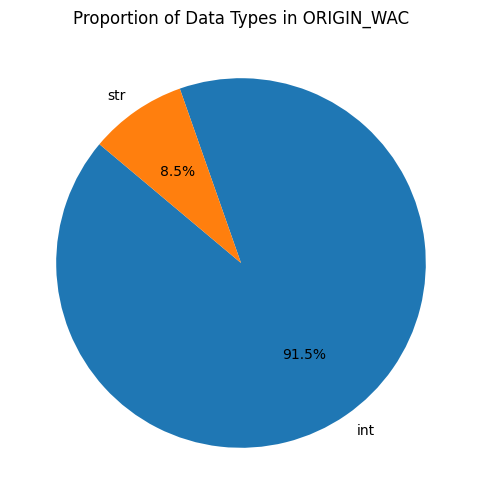

In [ ]:
def get_type(value):
    return type(value).__name__

type_series = df['ORIGIN_WAC'].apply(get_type)

type_proportions = type_series.value_counts(normalize=True)

plt.figure(figsize=(8, 6))
type_proportions.plot.pie(autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Data Types in ORIGIN_WAC')
plt.ylabel('')
plt.show()

del type_series


In [ ]:
int_only = filter_by_type(df, 'ORIGIN_WAC', int)


max_ = int_only['ORIGIN_WAC'].max()
min_ = int_only['ORIGIN_WAC'].min()
print(f"MAX: {max_}")
print(f"MIN: {min_}")

del int_only

MAX: 93
MIN: 1


In [ ]:
str_only = filter_by_type(df, 'ORIGIN_WAC', str)

unique_str_only = str_only['ORIGIN_WAC'].unique()

print(unique_str_only)

del str_only

['63' '34' '91' '85' '41' '87' '45' '74' '36' '33' '92' '72' '82' '38'
 '52' '23' '21' '13' '1' '93' '81' '22' '43' '64' '2' '37' '54' '53' '35'
 '67' '3' '4' '42' '11' '84' '73' '65' '44' '88' '66' '15' '71' '12' '51'
 '62' '83' '61' '86' '14' '39' '16' '7.00' '5']


### ! ORIGIN_WAC str to int

In [ ]:
df['ORIGIN_WAC'] = df['ORIGIN_WAC'].replace('7.00', 7)
df['ORIGIN_WAC'] = df['ORIGIN_WAC'].astype(int)
df['ORIGIN_WAC'].dtype

dtype('int64')

In [ ]:
df['ORIGIN_WAC'].nunique()

53

In [ ]:
df['ORIGIN_WAC'].unique()

array([74, 43, 93, 22, 91, 41, 81, 64, 33, 82,  2, 85, 87,  4, 13, 73, 23,
       36, 38, 34, 54, 88, 21,  3, 86, 72, 42, 92, 35, 63, 45, 61, 65, 52,
       44, 11, 83,  1, 15, 62, 12, 37, 51, 16, 66, 53, 84, 71, 67, 39,  5,
       14,  7])

In [ ]:
df['ORIGIN_WAC'].max()

93

In [ ]:
df['ORIGIN_WAC'].min()

1

### ORIGIN - ALL

In [ ]:
unique_origin = df[[col for col in df.columns if col.startswith('ORIGIN')]].drop_duplicates().sort_values('ORIGIN_AIRPORT_SEQ_ID')
unique_origin

,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC
124418,10135,1013503,30135,ABE,"Allentown/Bethlehem/Easton, PA",PA,42,Pennsylvania,23
2386508,10136,1013603,30136,ABI,"Abilene, TX",TX,48,Texas,74
6153,10140,1014003,30140,ABQ,"Albuquerque, NM",NM,35,New Mexico,86
176372,10141,1014103,30141,ABR,"Aberdeen, SD",SD,46,South Dakota,67
320976,10146,1014602,30146,ABY,"Albany, GA",GA,13,Georgia,34
...,...,...,...,...,...,...,...,...,...
70131,15841,1584102,35841,WRG,"Wrangell, AK",AK,2,Alaska,1
2159552,15897,1589702,35897,WYS,"West Yellowstone, MT",MT,30,Montana,84
109224,15919,1591902,31834,XNA,"Fayetteville, AR",AR,5,Arkansas,71
70119,15991,1599102,35991,YAK,"Yakutat, AK",AK,2,Alaska,1


### ORIGIN - ALL - type

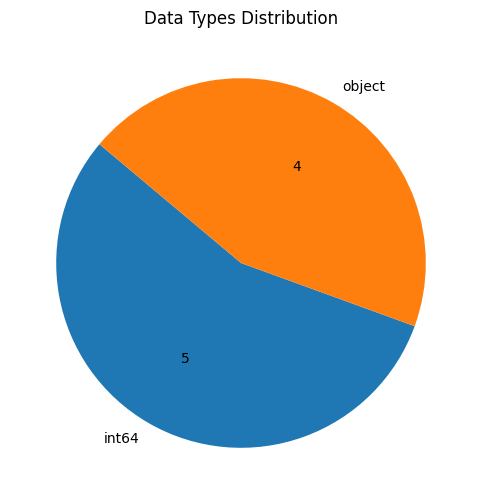

In [ ]:
data_types_count = unique_origin.dtypes.value_counts()

plt.figure(figsize=(6, 6))
patches, texts, autotexts = plt.pie(data_types_count, labels=data_types_count.index, startangle=140, autopct='%1.1f%%')

for i, (label, count) in enumerate(data_types_count.items()):
    autotexts[i].set_text(f'{count}')  

plt.title('Data Types Distribution')
plt.show()

In [ ]:

unique_types = {col: unique_origin[col].apply(get_type).unique() for col in unique_origin.columns}
unique_types

{'ORIGIN_AIRPORT_ID': array(['int'], dtype=object),
 'ORIGIN_AIRPORT_SEQ_ID': array(['int'], dtype=object),
 'ORIGIN_CITY_MARKET_ID': array(['int'], dtype=object),
 'ORIGIN': array(['str'], dtype=object),
 'ORIGIN_CITY_NAME': array(['str'], dtype=object),
 'ORIGIN_STATE_ABR': array(['str'], dtype=object),
 'ORIGIN_STATE_FIPS': array(['int'], dtype=object),
 'ORIGIN_STATE_NM': array(['str'], dtype=object),
 'ORIGIN_WAC': array(['int'], dtype=object)}

### ORIGIN - ALL - nunique

In [ ]:

unique_origin = df[[col for col in df.columns if col.startswith('ORIGIN')]].drop_duplicates().sort_values('ORIGIN_AIRPORT_SEQ_ID')
unique_origin.nunique()

ORIGIN_AIRPORT_ID        313
ORIGIN_AIRPORT_SEQ_ID    322
ORIGIN_CITY_MARKET_ID    291
ORIGIN                   313
ORIGIN_CITY_NAME         308
ORIGIN_STATE_ABR          52
ORIGIN_STATE_FIPS         52
ORIGIN_STATE_NM           52
ORIGIN_WAC                52
dtype: int64

### ORIGIN - ALL - AIRPORT

In [ ]:
cols = ['ORIGIN_AIRPORT_ID', 'ORIGIN']
origin_airport = unique_origin[cols].drop_duplicates()
origin_airport

,ORIGIN_AIRPORT_ID,ORIGIN
124418,10135,ABE
2386508,10136,ABI
6153,10140,ABQ
176372,10141,ABR
320976,10146,ABY
...,...,...
70131,15841,WRG
2159552,15897,WYS
109224,15919,XNA
70119,15991,YAK


### ORIGIN - ALL - city city_market_id

In [ ]:
cols = ['ORIGIN_CITY_NAME', 'ORIGIN_CITY_MARKET_ID']
origin_city = unique_origin[cols].drop_duplicates()
origin_city

,ORIGIN_CITY_NAME,ORIGIN_CITY_MARKET_ID
124418,"Allentown/Bethlehem/Easton, PA",30135
2386508,"Abilene, TX",30136
6153,"Albuquerque, NM",30140
176372,"Aberdeen, SD",30141
320976,"Albany, GA",30146
...,...,...
70131,"Wrangell, AK",35841
2159552,"West Yellowstone, MT",35897
109224,"Fayetteville, AR",31834
70119,"Yakutat, AK",35991


In [ ]:
grouped = origin_city.groupby('ORIGIN_CITY_MARKET_ID').size().reset_index(name='count').sort_values(by='count', ascending=False).head(10)
grouped

,ORIGIN_CITY_MARKET_ID,count
173,32575,5
122,31703,5
167,32457,3
55,30721,3
66,30852,2
16,30194,2
50,30647,2
217,33667,2
168,32467,2
193,33195,1


In [ ]:
grouped = origin_city.groupby('ORIGIN_CITY_MARKET_ID').size().reset_index(name='count')
filtered_groups = grouped[grouped['count'] > 1]['ORIGIN_CITY_MARKET_ID']

filtered_df = origin_city[origin_city['ORIGIN_CITY_MARKET_ID'].isin(filtered_groups)]
filtered_df.sort_values('ORIGIN_CITY_MARKET_ID')

,ORIGIN_CITY_NAME,ORIGIN_CITY_MARKET_ID
108852,"Dallas, TX",30194
0,"Dallas/Fort Worth, TX",30194
109082,"Akron, OH",30647
30128,"Cleveland, OH",30647
1013,"Boston, MA",30721
37442,"Providence, RI",30721
224566,"Manchester, NH",30721
9660,"Baltimore, MD",30852
3023,"Washington, DC",30852
338095,"Islip, NY",31703


### ORIGIN - ALL - city, state

In [ ]:
cols = [col for col in df.columns if col.startswith('ORIGIN') and 'AIRPORT' not in col]
origin_columns_city_state = df[cols].drop_duplicates().sort_values('ORIGIN_CITY_NAME')
origin_columns_city_state

,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC
176372,30141,ABR,"Aberdeen, SD",SD,46,South Dakota,67
2386508,30136,ABI,"Abilene, TX",TX,48,Texas,74
75518,30165,ADK,"Adak Island, AK",AK,2,Alaska,1
84617,30732,BQN,"Aguadilla, PR",PR,72,Puerto Rico,3
109082,30647,CAK,"Akron, OH",OH,39,Ohio,44
...,...,...,...,...,...,...,...
40853,32323,ILM,"Wilmington, NC",NC,37,North Carolina,36
84961,33933,ORH,"Worcester, MA",MA,25,Massachusetts,13
70131,35841,WRG,"Wrangell, AK",AK,2,Alaska,1
70119,35991,YAK,"Yakutat, AK",AK,2,Alaska,1


In [ ]:
cols = ['ORIGIN_STATE_ABR', 'ORIGIN_STATE_FIPS', 'ORIGIN_STATE_NM', 'ORIGIN_WAC']
unique_state = df[cols].drop_duplicates().sort_values('ORIGIN_STATE_ABR')
unique_state

,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC
35850,AK,2,Alaska,1
50201,AL,1,Alabama,51
109224,AR,5,Arkansas,71
153,AZ,4,Arizona,81
119,CA,6,California,91
332,CO,8,Colorado,82
25759,CT,9,Connecticut,11
301,FL,12,Florida,33
3510,GA,13,Georgia,34
394,HI,15,Hawaii,2


### ORIGIN - ALL - city, origin

In [ ]:
unique_city_origin = unique_origin[['ORIGIN', 'ORIGIN_CITY_NAME']].drop_duplicates().sort_values('ORIGIN')
unique_city_origin.head(10)

,ORIGIN,ORIGIN_CITY_NAME
124418,ABE,"Allentown/Bethlehem/Easton, PA"
2386508,ABI,"Abilene, TX"
6153,ABQ,"Albuquerque, NM"
176372,ABR,"Aberdeen, SD"
320976,ABY,"Albany, GA"
2289114,ACK,"Nantucket, MA"
130894,ACT,"Waco, TX"
161939,ACV,"Arcata/Eureka, CA"
125553,ACY,"Atlantic City, NJ"
75518,ADK,"Adak Island, AK"


In [ ]:
grouped = unique_city_origin.groupby('ORIGIN_CITY_NAME').size().reset_index(name='count')
filtered_groups = grouped[grouped['count'] > 1]['ORIGIN_CITY_NAME']
filtered_groups

56        Chicago, IL
129       Houston, TX
206      New York, NY
295    Washington, DC
Name: ORIGIN_CITY_NAME, dtype: object

In [ ]:
cities_to_filter = ['Chicago, IL', 'Houston, TX', 'New York, NY', 'Washington, DC']

filtered_sorted_df = unique_city_origin[unique_city_origin['ORIGIN_CITY_NAME'].isin(cities_to_filter)].sort_values('ORIGIN_CITY_NAME')

filtered_sorted_df

,ORIGIN,ORIGIN_CITY_NAME
109545,MDW,"Chicago, IL"
122,ORD,"Chicago, IL"
3516077,EFD,"Houston, TX"
34988,HOU,"Houston, TX"
517,IAH,"Houston, TX"
88,JFK,"New York, NY"
2473,LGA,"New York, NY"
3023,DCA,"Washington, DC"
5894,IAD,"Washington, DC"


## Columns DEST

In [ ]:
df_dest = df[[col for col in df.columns if col.startswith('DEST')]]
df_dest

,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC
0,11433,1143302,31295,DTW,"Detroit, MI",MI,26.0,Michigan,43.0
1,11433,1143302,31295,DTW,"Detroit, MI",MI,26.0,Michigan,43.0
2,11433,1143302,31295,DTW,"Detroit, MI",MI,26.0,Michigan,43.0
3,11433,1143302,31295,DTW,"Detroit, MI",MI,26.0,Michigan,43.0
4,11433,1143302,31295,DTW,"Detroit, MI",MI,26.0,Michigan,43.0
...,...,...,...,...,...,...,...,...,...
5635973,12892,1289204,32575,LAX,"Los Angeles, CA",CA,6.0,California,91.0
5635974,12892,1289204,32575,LAX,"Los Angeles, CA",CA,6.0,California,91.0
5635975,13232,1323202,30977,MDW,"Chicago, IL",IL,17.0,Illinois,41.0
5635976,14679,1467903,33570,SAN,"San Diego, CA",CA,6.0,California,91.0


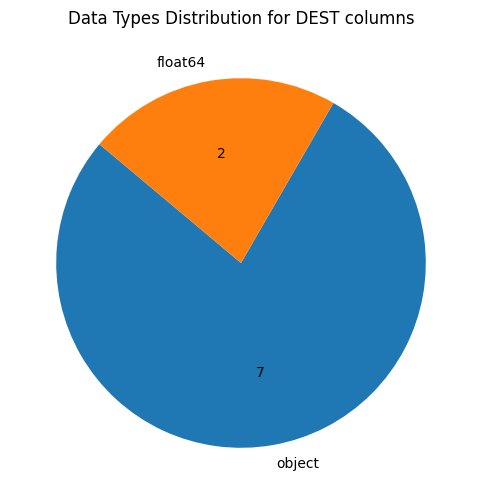

In [ ]:

data_types_count = df_dest.dtypes.value_counts()

plt.figure(figsize=(6, 6))
patches, texts, autotexts = plt.pie(data_types_count, labels=data_types_count.index, startangle=140, autopct='%1.1f%%')

for i, (label, count) in enumerate(data_types_count.items()):
    autotexts[i].set_text(f'{count}')  

plt.title('Data Types Distribution for DEST columns')
plt.show()

In [ ]:

unique_types = {col: df[col].apply(get_type).unique() for col in df_dest}
unique_types

{'DEST_AIRPORT_ID': array(['int', 'str'], dtype=object),
 'DEST_AIRPORT_SEQ_ID': array(['int', 'str'], dtype=object),
 'DEST_CITY_MARKET_ID': array(['int', 'str'], dtype=object),
 'DEST': array(['str'], dtype=object),
 'DEST_CITY_NAME': array(['str'], dtype=object),
 'DEST_STATE_ABR': array(['str'], dtype=object),
 'DEST_STATE_FIPS': array(['float'], dtype=object),
 'DEST_STATE_NM': array(['str'], dtype=object),
 'DEST_WAC': array(['float'], dtype=object)}

In [ ]:
df_dest.isna().sum()

DEST_AIRPORT_ID        0
DEST_AIRPORT_SEQ_ID    0
DEST_CITY_MARKET_ID    0
DEST                   0
DEST_CITY_NAME         0
DEST_STATE_ABR         0
DEST_STATE_FIPS        0
DEST_STATE_NM          0
DEST_WAC               0
dtype: int64

In [ ]:
df_dest.nunique()

DEST_AIRPORT_ID        606
DEST_AIRPORT_SEQ_ID    615
DEST_CITY_MARKET_ID    564
DEST                   310
DEST_CITY_NAME         306
DEST_STATE_ABR          52
DEST_STATE_FIPS         52
DEST_STATE_NM           52
DEST_WAC                52
dtype: int64

### DEST_AIRPORT_ID

In [ ]:
int_only = filter_by_type(df_dest, 'DEST_AIRPORT_ID', int)

max_ = int_only['DEST_AIRPORT_ID'].max()
min_ = int_only['DEST_AIRPORT_ID'].min()

print('Max:', max_)
print('Min:', min_)

del int_only


Max: 16218
Min: 10135


In [ ]:
str_only = filter_by_type(df_dest, 'DEST_AIRPORT_ID', str)

num_pattern = r'^\d+$'
non_matching_rows = str_only[~str_only['DEST_AIRPORT_ID'].str.match(num_pattern)]
display(non_matching_rows)

del str_only


,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC


In [ ]:

str_only = filter_by_type(df, 'DEST_AIRPORT_ID', str)

to_int = str_only['DEST_AIRPORT_ID'].astype(int)

max_ = to_int.max()
min_ = to_int.min()
print(f"MAX: {max_}")
print(f"MIN: {min_}")

del to_int
del str_only


MAX: 16218
MIN: 10135


### ! DEST_AIRPORT_ID str to int

In [ ]:
df['DEST_AIRPORT_ID'] = df['DEST_AIRPORT_ID'].astype(int)

In [ ]:
unique_types = df['DEST_AIRPORT_ID'].apply(get_type).unique()
unique_types


array(['int'], dtype=object)

In [ ]:
df['DEST_AIRPORT_ID'].dtype

dtype('int64')

In [ ]:
df['DEST_AIRPORT_ID'].unique()

array([11433, 11298, 12478, 14747, 13930, 14831, 15016, 11278, 15304,
       13303, 11292, 12892, 12758, 12266, 10423, 12889, 13204, 14869,
       15024, 10721, 11697, 14771, 12173, 13830, 15370, 14100, 14908,
       12264, 12953, 14492, 11618, 14524, 14057, 11057, 11540, 14679,
       14683, 13198, 10693, 14107, 13891, 15376, 14893, 13851, 12982,
       13931, 14635, 10821, 13487, 12012, 12339, 10397, 14843, 14262,
       13495, 11109, 13342, 12451, 14122, 14570, 13256, 14027, 11503,
       11267, 10140, 12896, 14730, 15027, 11423, 13871, 11042, 10529,
       11638, 11066, 12441, 13502, 12094, 13244, 12191, 10713, 13796,
       11884, 10299, 10792, 12278, 14307, 10257, 15096, 12323, 14321,
       14576, 10994, 13230, 11995, 10599, 10666, 10551, 10170, 10754,
       14709, 11630, 12819, 15991, 10926, 12523, 14828, 15841, 14256,
       13873, 13970, 10800, 10165, 12954, 15070, 12197, 14254, 10732,
       14986, 14685, 10785, 13933, 11252, 11193, 11637, 13485, 11986,
       11612, 10434,

### DEST_AIRPORT_SEQ_ID

In [ ]:
int_only = filter_by_type(df_dest, 'DEST_AIRPORT_SEQ_ID', int)

max_ = int_only['DEST_AIRPORT_SEQ_ID'].max()
min_ = int_only['DEST_AIRPORT_SEQ_ID'].min()

print('Max:', max_)
print('Min:', min_)

del int_only


Max: 1621801
Min: 1013503


In [ ]:
str_only = filter_by_type(df_dest, 'DEST_AIRPORT_SEQ_ID', str)

num_pattern = r'^\d+$'
non_matching_rows = str_only[~str_only['DEST_AIRPORT_SEQ_ID'].str.match(num_pattern)]
display(non_matching_rows)

del str_only


,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC


In [ ]:
str_only = filter_by_type(df_dest, 'DEST_AIRPORT_SEQ_ID', str)

to_int = str_only['DEST_AIRPORT_SEQ_ID'].astype(int)

max_ = to_int.max()
min_ = to_int.min()
print(f"MAX: {max_}")
print(f"MIN: {min_}")

del to_int
del str_only


MAX: 1621801
MIN: 1013503


### ! DEST_AIRPORT_SEQ_ID str to int


In [ ]:
df['DEST_AIRPORT_SEQ_ID'] = df['DEST_AIRPORT_SEQ_ID'].astype(int)

In [ ]:
unique_types = df['DEST_AIRPORT_SEQ_ID'].apply(get_type).unique()
unique_types


array(['int'], dtype=object)

In [ ]:
df['DEST_AIRPORT_SEQ_ID'].dtype

dtype('int64')

In [ ]:
df['DEST_AIRPORT_SEQ_ID'].unique()

array([1143302, 1129804, 1247803, 1474703, 1393004, 1483103, 1501603,
       1127803, 1530402, 1330303, 1129202, 1289203, 1275803, 1226603,
       1042302, 1288903, 1320402, 1486903, 1502403, 1072102, 1169704,
       1477102, 1217302, 1383002, 1537002, 1410002, 1490803, 1226402,
       1295302, 1449202, 1161802, 1452401, 1405702, 1105703, 1154003,
       1467903, 1468303, 1319801, 1069302, 1410702, 1389101, 1537602,
       1489302, 1385103, 1298202, 1393102, 1463502, 1082103, 1348702,
       1201203, 1233904, 1039705, 1484304, 1426204, 1349503, 1110902,
       1334205, 1245102, 1412202, 1457002, 1325602, 1402702, 1150303,
       1126702, 1014003, 1289605, 1473003, 1502704, 1142304, 1387102,
       1104203, 1052904, 1163805, 1106603, 1244102, 1350202, 1209402,
       1324402, 1219102, 1071302, 1379604, 1188402, 1029904, 1079204,
       1227803, 1430702, 1025702, 1509602, 1232303, 1432103, 1457604,
       1099402, 1323002, 1199502, 1059904, 1066602, 1055102, 1017001,
       1075403, 1470

### DEST_AIRPORT_ID and DEST_AIRPORT_SEQ_ID

In [ ]:

# Function to check if the ORIGIN_AIRPORT_SEQ_ID matches the rule using arithmetic
def does_not_match(row, col1, col2):
    origin_airport_id = row[col1]
    origin_airport_seq_id = row[col2]
    
    # Convert both to string to perform the necessary checks
    origin_airport_id_str = str(origin_airport_id)
    origin_airport_seq_id_str = str(origin_airport_seq_id)
    
    # Check if ORIGIN_AIRPORT_SEQ_ID starts with ORIGIN_AIRPORT_ID and has exactly two more digits
    return not (origin_airport_seq_id_str.startswith(origin_airport_id_str) and 
                len(origin_airport_seq_id_str) == len(origin_airport_id_str) + 2)

# Apply the function to get the boolean mask
mask = df_dest.apply(does_not_match, axis=1, col1='DEST_AIRPORT_ID', col2='DEST_AIRPORT_SEQ_ID')

# Filter the DataFrame with the mask
non_matching_rows = df[mask]

display(non_matching_rows)



,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,...,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,Unnamed: 64


### DEST_CITY_MARKET_ID

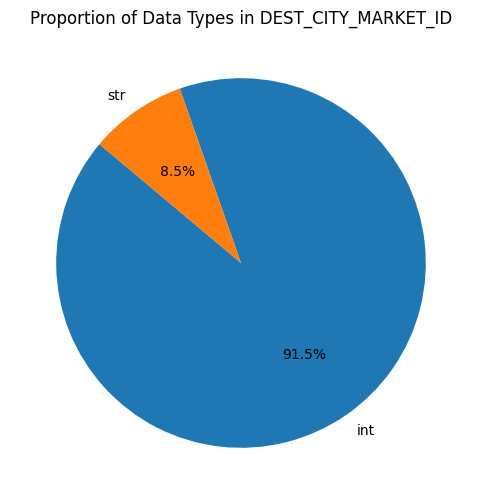

In [ ]:
def get_type(value):
    return type(value).__name__

type_series = df_dest['DEST_CITY_MARKET_ID'].apply(get_type)

type_proportions = type_series.value_counts(normalize=True)

plt.figure(figsize=(8, 6))
type_proportions.plot.pie(autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Data Types in DEST_CITY_MARKET_ID')
plt.ylabel('')
plt.show()

del type_series


In [ ]:
int_only = filter_by_type(df_dest, 'DEST_CITY_MARKET_ID', int)

max_ = int_only['DEST_CITY_MARKET_ID'].max()
min_ = int_only['DEST_CITY_MARKET_ID'].min()

print('Max:', max_)
print('Min:', min_)

del int_only


Max: 35991
Min: 30070


In [ ]:
str_only = filter_by_type(df_dest, 'DEST_CITY_MARKET_ID', str)

num_pattern = r'^\d+$'
non_matching_rows = str_only[~str_only['DEST_CITY_MARKET_ID'].str.match(num_pattern)]
display(non_matching_rows)

del str_only


,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC


In [ ]:
str_only = filter_by_type(df_dest, 'DEST_CITY_MARKET_ID', str)

to_int = str_only['DEST_CITY_MARKET_ID'].astype(int)

max_ = to_int.max()
min_ = to_int.min()
print(f"MAX: {max_}")
print(f"MIN: {min_}")

del to_int
del str_only


MAX: 35991
MIN: 30070


### ! DEST_CITY_MARKET_ID str to int


In [ ]:
df['DEST_CITY_MARKET_ID'] = df['DEST_CITY_MARKET_ID'].astype(int)



In [ ]:
unique_types = df['DEST_CITY_MARKET_ID'].apply(get_type).unique()
unique_types


array(['int'], dtype=object)

In [ ]:

df['DEST_CITY_MARKET_ID'].dtype

dtype('int64')

In [ ]:

df['DEST_CITY_MARKET_ID'].unique()

array([31295, 30194, 31703, 30559, 30977, 32457, 31123, 30852, 33195,
       32467, 30325, 32575, 32758, 31453, 30423, 32211, 31454, 34614,
       34945, 30721, 32134, 33830, 34653, 34100, 34492, 34524, 34057,
       31057, 30615, 33570, 33214, 33198, 30693, 30466, 30436, 33192,
       33851, 32982, 33667, 31714, 31650, 32012, 32337, 30397, 34819,
       34262, 33495, 30189, 33342, 31136, 30198, 34570, 33256, 34027,
       31503, 31267, 30140, 32896, 33044, 34992, 31423, 33316, 30647,
       30529, 31638, 31066, 32441, 33502, 34699, 33244, 30713, 31884,
       30299, 30792, 30928, 30257, 35096, 32323, 34321, 34576, 30994,
       32070, 31995, 30599, 30666, 30113, 30070, 30107, 30073, 31517,
       31401, 35991, 30913, 32523, 34828, 35841, 34256, 33873, 33970,
       30165, 34254, 30732, 34986, 34685, 30785, 33933, 31252, 33105,
       31637, 33485, 31986, 31612, 30434, 30620, 30208, 35323, 31973,
       33360, 30849, 30980, 33486, 30990, 32945, 31624, 31481, 31504,
       31871, 30408,

### DEST

In [ ]:
df['DEST'].unique()

array(['DTW', 'DFW', 'JFK', 'SEA', 'ORD', 'SJC', 'STL', 'DCA', 'TPA',
       'MIA', 'DEN', 'LAX', 'KOA', 'IAH', 'AUS', 'LAS', 'MCO', 'SLC',
       'STT', 'BOS', 'FLL', 'SFO', 'HNL', 'OGG', 'TUL', 'PHL', 'SNA',
       'IAD', 'LGA', 'RDU', 'EWR', 'RIC', 'PDX', 'CLT', 'ELP', 'SAN',
       'SAT', 'MCI', 'BNA', 'PHX', 'ONT', 'TUS', 'SMF', 'OKC', 'LIH',
       'ORF', 'RSW', 'BWI', 'MSP', 'GUC', 'IND', 'ATL', 'SJU', 'PSP',
       'MSY', 'COS', 'MKE', 'JAX', 'PIT', 'RNO', 'MFE', 'PBI', 'EGE',
       'DAY', 'ABQ', 'LBB', 'SDF', 'STX', 'DSM', 'OMA', 'CLE', 'BDL',
       'FAT', 'CMH', 'JAC', 'MTJ', 'HDN', 'MEM', 'HOU', 'BOI', 'OAK',
       'GEG', 'ANC', 'BUF', 'ICT', 'PVD', 'ALB', 'SYR', 'ILM', 'PWM',
       'ROC', 'CHS', 'MDT', 'GSO', 'BHM', 'BLI', 'BET', 'ADQ', 'BRW',
       'SCC', 'FAI', 'KTN', 'YAK', 'CDV', 'JNU', 'SIT', 'WRG', 'PSG',
       'OME', 'OTZ', 'BUR', 'ADK', 'LGB', 'SWF', 'HPN', 'PSE', 'BQN',
       'SRQ', 'SAV', 'BTV', 'ORH', 'DAB', 'CVG', 'FAR', 'MSN', 'GRR',
       'EVV', 'AVP',

### DEST_CITY_NAME

In [ ]:
df['DEST_CITY_NAME'].unique()

array(['Detroit, MI', 'Dallas/Fort Worth, TX', 'New York, NY',
       'Seattle, WA', 'Chicago, IL', 'San Jose, CA', 'St. Louis, MO',
       'Washington, DC', 'Tampa, FL', 'Miami, FL', 'Denver, CO',
       'Los Angeles, CA', 'Kona, HI', 'Houston, TX', 'Austin, TX',
       'Las Vegas, NV', 'Orlando, FL', 'Salt Lake City, UT',
       'Charlotte Amalie, VI', 'Boston, MA', 'Fort Lauderdale, FL',
       'San Francisco, CA', 'Honolulu, HI', 'Kahului, HI', 'Tulsa, OK',
       'Philadelphia, PA', 'Santa Ana, CA', 'Raleigh/Durham, NC',
       'Newark, NJ', 'Richmond, VA', 'Portland, OR', 'Charlotte, NC',
       'El Paso, TX', 'San Diego, CA', 'San Antonio, TX',
       'Kansas City, MO', 'Nashville, TN', 'Phoenix, AZ', 'Ontario, CA',
       'Tucson, AZ', 'Sacramento, CA', 'Oklahoma City, OK', 'Lihue, HI',
       'Norfolk, VA', 'Fort Myers, FL', 'Baltimore, MD',
       'Minneapolis, MN', 'Gunnison, CO', 'Indianapolis, IN',
       'Atlanta, GA', 'San Juan, PR', 'Palm Springs, CA',
       'New Orlea

0                      Detroit, MI
26           Dallas/Fort Worth, TX
57                    New York, NY
88                     Seattle, WA
119                    Chicago, IL
                    ...           
2386171    Manhattan/Ft. Riley, KS
2386512                Abilene, TX
3122155           Grand Island, NE
4367575            Punta Gorda, FL
4692229                 Saipan, TT
Name: DEST_CITY_NAME, Length: 306, dtype: object

In [ ]:
df_unique_city_name = df['DEST_CITY_NAME'].drop_duplicates()


pattern = r'^[A-Za-z\s]+(?:/[A-Za-z\s]+)*, [A-Z]{2}$'

# Apply the regex pattern to the column and create a boolean mask
mask = df_unique_city_name.str.match(pattern)

# Filter and display non-matching rows
non_matching_rows = df_unique_city_name[~mask]

print(non_matching_rows)

del df_unique_city_name

210                    St. Louis, MO
108005     Scranton/Wilkes-Barre, PA
111731             St. Augustine, FL
143398                St. George, UT
179076          Sault Ste. Marie, MI
2285592        Martha's Vineyard, MA
2386171      Manhattan/Ft. Riley, KS
Name: DEST_CITY_NAME, dtype: object


### DEST_STATE_ABR

In [ ]:
df['DEST_STATE_ABR'].unique()

array(['MI', 'TX', 'NY', 'WA', 'IL', 'CA', 'MO', 'VA', 'FL', 'CO', 'HI',
       'NV', 'UT', 'VI', 'MA', 'OK', 'PA', 'NC', 'NJ', 'OR', 'TN', 'AZ',
       'MD', 'MN', 'IN', 'GA', 'PR', 'LA', 'WI', 'OH', 'NM', 'KY', 'IA',
       'NE', 'CT', 'WY', 'ID', 'AK', 'KS', 'RI', 'ME', 'SC', 'AL', 'VT',
       'ND', 'MT', 'MS', 'SD', 'AR', 'NH', 'WV', 'TT'], dtype=object)

### DEST_STATE_FIPS


In [ ]:
df['DEST_STATE_FIPS'].unique()

array([26., 48., 36., 53., 17.,  6., 29., 51., 12.,  8., 15., 32., 49.,
       78., 25., 40., 42., 37., 34., 41., 47.,  4., 24., 27., 18., 13.,
       72., 22., 55., 39., 35., 21., 19., 31.,  9., 56., 16.,  2., 20.,
       44., 23., 45.,  1., 50., 38., 30., 28., 46.,  5., 33., 54., 75.])

### ! DEST_STATE_FIPS float to int


In [ ]:
df['DEST_STATE_FIPS'] = df['DEST_STATE_FIPS'].astype(int)



In [ ]:
df['DEST_STATE_FIPS'].dtype

dtype('int64')

In [ ]:
df['DEST_STATE_FIPS'].unique()

array([26, 48, 36, 53, 17,  6, 29, 51, 12,  8, 15, 32, 49, 78, 25, 40, 42,
       37, 34, 41, 47,  4, 24, 27, 18, 13, 72, 22, 55, 39, 35, 21, 19, 31,
        9, 56, 16,  2, 20, 44, 23, 45,  1, 50, 38, 30, 28, 46,  5, 33, 54,
       75])

### DEST_STATE_NM

In [ ]:
df['DEST_STATE_NM'].unique()

array(['Michigan', 'Texas', 'New York', 'Washington', 'Illinois',
       'California', 'Missouri', 'Virginia', 'Florida', 'Colorado',
       'Hawaii', 'Nevada', 'Utah', 'U.S. Virgin Islands', 'Massachusetts',
       'Oklahoma', 'Pennsylvania', 'North Carolina', 'New Jersey',
       'Oregon', 'Tennessee', 'Arizona', 'Maryland', 'Minnesota',
       'Indiana', 'Georgia', 'Puerto Rico', 'Louisiana', 'Wisconsin',
       'Ohio', 'New Mexico', 'Kentucky', 'Iowa', 'Nebraska',
       'Connecticut', 'Wyoming', 'Idaho', 'Alaska', 'Kansas',
       'Rhode Island', 'Maine', 'South Carolina', 'Alabama', 'Vermont',
       'North Dakota', 'Montana', 'Mississippi', 'South Dakota',
       'Arkansas', 'New Hampshire', 'West Virginia',
       'U.S. Pacific Trust Territories and Possessions'], dtype=object)

### DEST_STATE_ABR and DEST_STATE_NM 

In [ ]:
df_dest[['DEST_STATE_NM', 'DEST_STATE_ABR']].drop_duplicates()

,DEST_STATE_NM,DEST_STATE_ABR
0,Michigan,MI
26,Texas,TX
57,New York,NY
88,Washington,WA
119,Illinois,IL
122,California,CA
210,Missouri,MO
239,Virginia,VA
270,Florida,FL
363,Colorado,CO


### DEST_WAC

In [ ]:
df['DEST_WAC'].unique()

array([43., 74., 22., 93., 41., 91., 64., 38., 33., 82.,  2., 85., 87.,
        4., 13., 73., 23., 36., 21., 92., 54., 81., 35., 63., 42., 34.,
        3., 72., 45., 44., 86., 52., 61., 65., 11., 88., 83.,  1., 62.,
       15., 12., 37., 51., 16., 66., 84., 53., 67., 71., 14., 39.,  5.])

In [ ]:
df['DEST_WAC'].dtype

dtype('float64')

### ! DEST_WAC float to int

In [ ]:
df['DEST_WAC'] = df['DEST_WAC'].astype(int)



In [ ]:
df['DEST_WAC'].dtype

dtype('int64')

In [ ]:
df['DEST_WAC'].unique()

array([43, 74, 22, 93, 41, 91, 64, 38, 33, 82,  2, 85, 87,  4, 13, 73, 23,
       36, 21, 92, 54, 81, 35, 63, 42, 34,  3, 72, 45, 44, 86, 52, 61, 65,
       11, 88, 83,  1, 62, 15, 12, 37, 51, 16, 66, 84, 53, 67, 71, 14, 39,
        5])

### DEST states

In [ ]:
dest_states = df[['DEST_STATE_NM', 'DEST_STATE_ABR', 'DEST_STATE_FIPS', 'DEST_WAC']].drop_duplicates()
dest_states.head(10)

,DEST_STATE_NM,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_WAC
0,Michigan,MI,26,43
26,Texas,TX,48,74
57,New York,NY,36,22
88,Washington,WA,53,93
119,Illinois,IL,17,41
122,California,CA,6,91
210,Missouri,MO,29,64
239,Virginia,VA,51,38
270,Florida,FL,12,33
363,Colorado,CO,8,82


In [ ]:
dest_states.shape

(52, 4)

### DEST - ALL

In [ ]:
df_dest = df[[col for col in df.columns if col.startswith('DEST')]]
df_dest.nunique()

DEST_AIRPORT_ID        310
DEST_AIRPORT_SEQ_ID    319
DEST_CITY_MARKET_ID    289
DEST                   310
DEST_CITY_NAME         306
DEST_STATE_ABR          52
DEST_STATE_FIPS         52
DEST_STATE_NM           52
DEST_WAC                52
dtype: int64

In [ ]:
df_dest.dtypes

DEST_AIRPORT_ID         int64
DEST_AIRPORT_SEQ_ID     int64
DEST_CITY_MARKET_ID     int64
DEST                   object
DEST_CITY_NAME         object
DEST_STATE_ABR         object
DEST_STATE_FIPS         int64
DEST_STATE_NM          object
DEST_WAC                int64
dtype: object

### Compare DEST and ORIGIN states


In [ ]:
df_origin = df[[col for col in df.columns if col.startswith('ORIGIN')]].drop_duplicates().sort_values('ORIGIN_AIRPORT_ID')
df_origin.head(10)


,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC
124418,10135,1013503,30135,ABE,"Allentown/Bethlehem/Easton, PA",PA,42,Pennsylvania,23
2386508,10136,1013603,30136,ABI,"Abilene, TX",TX,48,Texas,74
6153,10140,1014003,30140,ABQ,"Albuquerque, NM",NM,35,New Mexico,86
176372,10141,1014103,30141,ABR,"Aberdeen, SD",SD,46,South Dakota,67
320976,10146,1014602,30146,ABY,"Albany, GA",GA,13,Georgia,34
2289114,10154,1015403,30154,ACK,"Nantucket, MA",MA,25,Massachusetts,13
130894,10155,1015502,30155,ACT,"Waco, TX",TX,48,Texas,74
161939,10157,1015703,30157,ACV,"Arcata/Eureka, CA",CA,6,California,91
125553,10158,1015804,30158,ACY,"Atlantic City, NJ",NJ,34,New Jersey,21
75518,10165,1016503,30165,ADK,"Adak Island, AK",AK,2,Alaska,1


In [ ]:
df_dest = df[[col for col in df.columns if col.startswith('DEST')]].drop_duplicates().sort_values('DEST_AIRPORT_ID')
df_dest.head(10)

,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC
124435,10135,1013503,30135,ABE,"Allentown/Bethlehem/Easton, PA",PA,42,Pennsylvania,23
2386512,10136,1013603,30136,ABI,"Abilene, TX",TX,48,Texas,74
14942,10140,1014003,30140,ABQ,"Albuquerque, NM",NM,35,New Mexico,86
176403,10141,1014103,30141,ABR,"Aberdeen, SD",SD,46,South Dakota,67
323422,10146,1014602,30146,ABY,"Albany, GA",GA,13,Georgia,34
2289120,10154,1015403,30154,ACK,"Nantucket, MA",MA,25,Massachusetts,13
131269,10155,1015502,30155,ACT,"Waco, TX",TX,48,Texas,74
139216,10157,1015703,30157,ACV,"Arcata/Eureka, CA",CA,6,California,91
122606,10158,1015804,30158,ACY,"Atlantic City, NJ",NJ,34,New Jersey,21
75519,10165,1016503,30165,ADK,"Adak Island, AK",AK,2,Alaska,1


In [ ]:
df_dest_cp = df_dest.copy()
df_origin_cp = df_origin.copy()

df_origin_cp.columns = df_origin_cp.columns.str.replace('ORIGIN_', '')
df_dest_cp.columns = df_dest_cp.columns.str.replace('DEST_', '')

# Ensure both DataFrames have a common key for merging (e.g., AIRPORT_ID)
# Here, assuming 'AIRPORT_ID' is a common key
common_key = 'AIRPORT_SEQ_ID'
df_origin_cp = df_origin_cp.rename(columns={'ORIGIN_AIRPORT_ID': common_key})
df_dest_cp = df_dest_cp.rename(columns={'DEST_AIRPORT_ID': common_key})

# Merge the DataFrames to find differences
comparison_df = pd.merge(df_origin_cp, df_dest_cp, on=common_key, how='outer', suffixes=('_origin', '_dest'), indicator=True)

# Filter rows to find non-matching entries
non_matching_rows = comparison_df[comparison_df['_merge'] != 'both']

non_matching_rows

,AIRPORT_ID_origin,AIRPORT_SEQ_ID,CITY_MARKET_ID_origin,ORIGIN,CITY_NAME_origin,STATE_ABR_origin,STATE_FIPS_origin,STATE_NM_origin,WAC_origin,AIRPORT_ID_dest,CITY_MARKET_ID_dest,DEST,CITY_NAME_dest,STATE_ABR_dest,STATE_FIPS_dest,STATE_NM_dest,WAC_dest,_merge
28,10558,1055803,30558,BFF,"Scottsbluff, NE",NE,31,Nebraska,65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
94,11495,1149502,31453,EFD,"Houston, TX",TX,48,Texas,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
99,11563,1156303,31563,ENV,"Wendover, UT",UT,49,Utah,87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [ ]:
filtered_df_dest = df_dest[df_dest['DEST_AIRPORT_SEQ_ID'] == 1055803]
filtered_df_dest

,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC


In [ ]:
filtered_df_origin = df_origin[df_origin['ORIGIN_AIRPORT_SEQ_ID'] == 1055803]
filtered_df_origin

,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC
2097279,10558,1055803,30558,BFF,"Scottsbluff, NE",NE,31,Nebraska,65


In [ ]:
filtered_df_dest = df_dest[df_dest['DEST_CITY_NAME'] == 'Scottsbluff, NE']
filtered_df_dest

,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC


In [ ]:
filtered_df_origin = df_origin[df_origin['ORIGIN_CITY_NAME'] == 'Scottsbluff, NE']
filtered_df_origin

,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC
2097279,10558,1055803,30558,BFF,"Scottsbluff, NE",NE,31,Nebraska,65


In [ ]:
df_dest.nunique()

DEST_AIRPORT_ID        310
DEST_AIRPORT_SEQ_ID    319
DEST_CITY_MARKET_ID    289
DEST                   310
DEST_CITY_NAME         306
DEST_STATE_ABR          52
DEST_STATE_FIPS         52
DEST_STATE_NM           52
DEST_WAC                52
dtype: int64

In [ ]:
df_origin.nunique()

ORIGIN_AIRPORT_ID        313
ORIGIN_AIRPORT_SEQ_ID    322
ORIGIN_CITY_MARKET_ID    291
ORIGIN                   313
ORIGIN_CITY_NAME         308
ORIGIN_STATE_ABR          52
ORIGIN_STATE_FIPS         52
ORIGIN_STATE_NM           52
ORIGIN_WAC                52
dtype: int64

### DEST + ORIGIN = LOCATION (prepare for SQL)

In [ ]:
df_origin = df[[col for col in df.columns if col.startswith('ORIGIN_')]].rename(columns=lambda x: x.replace('ORIGIN_', '')).drop_duplicates()
df_dest = df[[col for col in df.columns if col.startswith('DEST_')]].rename(columns=lambda x: x.replace('DEST_', '')).drop_duplicates()

# Concatenate the two DataFrames
df_location = pd.concat([df_origin, df_dest], ignore_index=True).drop_duplicates()

df_location

,AIRPORT_ID,AIRPORT_SEQ_ID,CITY_MARKET_ID,CITY_NAME,STATE_ABR,STATE_FIPS,STATE_NM,WAC
0,11298,1129804,30194,"Dallas/Fort Worth, TX",TX,48,Texas,74
1,11433,1143302,31295,"Detroit, MI",MI,26,Michigan,43
2,14747,1474703,30559,"Seattle, WA",WA,53,Washington,93
3,12478,1247803,31703,"New York, NY",NY,36,New York,22
4,14831,1483103,32457,"San Jose, CA",CA,6,California,91
...,...,...,...,...,...,...,...,...
317,11495,1149502,31453,"Houston, TX",TX,48,Texas,74
318,14082,1408202,34082,"Punta Gorda, FL",FL,12,Florida,33
319,14955,1495503,34955,"Saipan, TT",TT,75,U.S. Pacific Trust Territories and Possessions,5
320,11563,1156303,31563,"Wendover, UT",UT,49,Utah,87
